<H1>Ecommerce Product Range Analysis
    <H4>By, Maor Ohayon

We can learn a lot about your customers' habits, likes, and dislikes with an e-commerce data analysis study. 
    
Using the information gleaned from customer's data , companies may fine-tune their advertising efforts 
    
and provide a more satisfying service overall.

### Pourpose 

The goal of this project is to analyze the product range of an E-commerce store.

Our client is an online store that sells a wide range of household products.

The project will aim to identify the following objectives:

1. Identifying trends in customer behavior and preferences in the context of product range.

2. Identifying gaps in product offerings and identify opportunities for new products.

3. Analyzing customer data to develop personalized product recommendations.

4. Identifing customer demand and shopping behavior during different times of the year.

5. Track sales performance to identify opportunities for optimization.


### Dscription Of The Data

The dataset contains the transaction history of an online store that sells household goods.

The file `ecommerce_dataset_us.csv` contains the following columns:

- **InvoiceNo:** order identifier

- **StockCode:** item identifier

- **Description:** item name

- **Quantity**

- **InvoiceDate:** order date

- **UnitPrice:** — price per item

- **CustomerID**

For this project, I'd decide to use Lucidcharts' mind maps. 

They'll assit with illustrating the relationships between variables and presenting conclusions.

#### Table of Content

* [**1. Data Load**](#data)
    * [Loadig liberaries](#loading)
    * [Profile Report](#profile)
    * [Info & Basic samples](#sample)
    * [Chapter 1: Summary](#1)


* [**2. Data Preprocessing**](#2)
    * [Renaming columns](#renaming)
    * [Data Conversions](#conversion)
    * [Processing Duplicatess](#duplicates)
    * [Processing Missing Values](#missing)
    * [Chapter 2: Summary](#3)


* [**EDA**](#eda)
    * [Descriptions With multiple stock_codes](#top10des)
    * [Stock Codes with multiple descriptions](#multides)
    * [Stock Codes That Generate More Then 50k](#topdessales)
    * [Less Profitable Stock Codes](#100)
    * [Descriptions That Generate More Then 50k](#101)
    * [Less Profitable Descriptions](#102)
    * [Stock Codes & Decriptions By Net Revenue](#103)
    * [Most Affordable & Most Expensive Products](#104)
    * [Low Demand Stock Codes](#105)
    * [Low Demand Descriptions](#106)
    * [Unprofitable Descriptions](#107)
    * [most profitable months](#profitmonth)


* [**Sesaonality**](#seasonality)
    * [Top Season By Total Revenue](#Topseason)
    * [Seasons Proprtions In Revenue](#seaprop)
    * [Quantity By Seasons](#quansea)
    * [Top Stock Codes & Descriptions By Seasons](#108)
    * [Top Products By Seasons, Month, Year & Quantity](#109)
    * [Expenses Vs. Income By Seasons](#expe)
    * [Proportion Of Unique Descriptions By Year & Seasons](#round)
    * [Descriptions Count By Seasons](#rare)
    * [Stock Codes Count By Seasons](#dds)



* [**Months**](#months)
    * [Revenue By Unique Descriptions Over Months](#110)
    * [Range of Products By Months](#113)
    * [Revenus Total & Transactions Count By Months](#111)
    * [Customer Traffic Over Months](#114)
    * [AOV By Months](#aov)
    * [Quantities By Months](#112)
    * [Revenue Shifts By Month](#revshi)
    * [Unique Descriptions Shifts By Month](#desshi)
    * [Transactions Shifts By Month](#transit)
    * [Top Goods By Revenue Growth](#revgain)
    
    
* [**Weeks**](#115)
    * [Top Weeks By Descriptions](#116)
    * [Potentional Gain Weeks](#117)
    
    
* [**Days**](#118)
    * [Days Distribution](#119)
    * [Top Quantities By Days](#120)
    * [Friday Features](#121)
    * [Monday Features](#122)
    * [Top Day By Revenue](#123)
    * [Missed Opportunities](#124)

    
* [**Formulate and test statistical hypotheses**](#125)


* [**Summary & Findings**](#1)


* [**Conclusions & Recommendations**](#545)


* [**Resources**](#resource)
    * [Color Palletes](#colorpalletes)
        * [Base Colors](#basecolors)
        * [Tableau Colors](#TABLEAU_COLORS)
        * [CSS4 Pallete](#CSS4)
        * [XKCD Pallete](#XKCD)

<a id="data"></a>

<a id="loading"></a>

### Loading Data

#### Importing Librareis

In [1]:
import sys
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from statsmodels.tsa.seasonal import seasonal_decompose
if not sys.warnoptions:
       warnings.simplefilter("ignore")
import pandas as pd
from collections import Counter
import calplot
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
from matplotlib.colors import ListedColormap
from pandas_profiling.visualisation.plot import timeseries_heatmap
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
from pandas_profiling import ProfileReport
import math
from functools import reduce
import random
import re 
import seaborn as sns
import sidetable
import scipy
from scipy import stats

In [2]:
try:
    ecommerce = pd.read_csv('/Users/ohayo/Desktop/Final Project/ecommerce_dataset_us.csv', sep='\t')
    print('Final Project - local')
except:
    ecommerce = p.read_csv('/datasets/ecommerce_dataset_us.csv')
    print('wrong path')
    print('Final Project')

Final Project - local


In [3]:
pd.set_option('max_colwidth', 600)

#### Profile Report

<a id="profile"></a>

#### Profile Report

In [4]:
profile = ProfileReport(ecommerce, title='Ecommerce Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Data Info & Samples

<a id="sample"></a>

In [5]:
print('(っ◔◡◔)っ ❖︎ Info ❖︎:')
print()
print(('≋''≋','≋''≋') * 4)
print()
print(ecommerce.info(memory_usage='deep'))

(っ◔◡◔)っ ❖︎ Info ❖︎:

('≋≋', '≋≋', '≋≋', '≋≋', '≋≋', '≋≋', '≋≋', '≋≋')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 157.9 MB
None


<div class="alert alert-block alert-info">
<b>Insight</b> <a class="tocSkip"></a>

Our DataFrame contain 541,909 rows & 7 columns
    
<b>Data issues and strategies</b> <a class="tocSkip"></a>
    
Right from here we can see that Description & CustomerID has missing values.

InvoiceNo labeled as object , we might nedd to change it.
    
InvoiceDate labeled as object , we need to change it to datetime so we can work with dates & times.

CustomerId labeled as float.
    
Column names should be changed so it would be easier to work with.
</div>

***Now let's pull some rows and get some basic sense of the data:***

In [6]:
print('-'*100)
print('【﻿Ｈｅａｄ】:')
display(ecommerce.head(5))

print('-'*100)

print('【﻿Ｔａｉｌ】:')
display(ecommerce.tail(5))

print('-'*100)

print('【﻿Ｓａｍｐｌｅｓ】:')
display(ecommerce.sample(2))

print('-'*100)
print('【﻿Ｄｅｓｃｒｉｂｅ】:')
display(ecommerce.describe(include='all'))

----------------------------------------------------------------------------------------------------
【﻿Ｈｅａｄ】:


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID  
0  11/29/2018 08:26       2.55     17850.0  
1  11/29/2018 08:26       3.39     17850.0  
2  11/29/2018 08:26       2.75     17850.0  
3  11/29/2018 08:26       3.39     17850.0  
4  11/29/2018 08:26       3.39     17850.0

----------------------------------------------------------------------------------------------------
【﻿Ｔａｉｌ】:


InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID  
541904  12/07/2019 12:50       0.85     12680.0  
541905  12/07/2019 12:50       2.10     12680.0  
541906  12/07/2019 12:50       4.15     12680.0  
541907  12/07/2019 12:50       4.15     12680.0  
541908  12/07/2019 12:50       4.95     12680.0

----------------------------------------------------------------------------------------------------
【﻿Ｓａｍｐｌｅｓ】:


InvoiceNo StockCode                        Description  Quantity  \
484697    577536     23084                 RABBIT NIGHT LIGHT         2   
337368    566446     21890  S/6 WOODEN SKITTLES IN COTTON BAG         1   

             InvoiceDate  UnitPrice  CustomerID  
484697  11/18/2019 14:14       2.08     15850.0  
337368  09/10/2019 15:40       5.79         NaN

----------------------------------------------------------------------------------------------------
【﻿Ｄｅｓｃｒｉｂｅ】:


InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000000   

             InvoiceDate      UnitPrice     CustomerID  
count             541909  541909.000000  406829.000000  
unique             23260            NaN            NaN  
top     10/29/2019 14:41            NaN            NaN  
freq                1114            NaN            NaN  
mean                 NaN       4.611114   15287.690570  
std                  NaN      96.759853    1713.600303  
min                  NaN  -11062.060000   12346.000000  
25%                  NaN       1.250000   13953.000000  
50%                  NaN       2.080000   15152.000000  
75%                  NaN       4.130000   16791.000000  
max                  NaN   38970.000000   18287.000000


【﻿Ｎｕｍｅｒｉｃ　Ｆｅａｔｕｒｅｓ　Ｄｉｓｔｒｉｂｕｔｉｏｎ：】


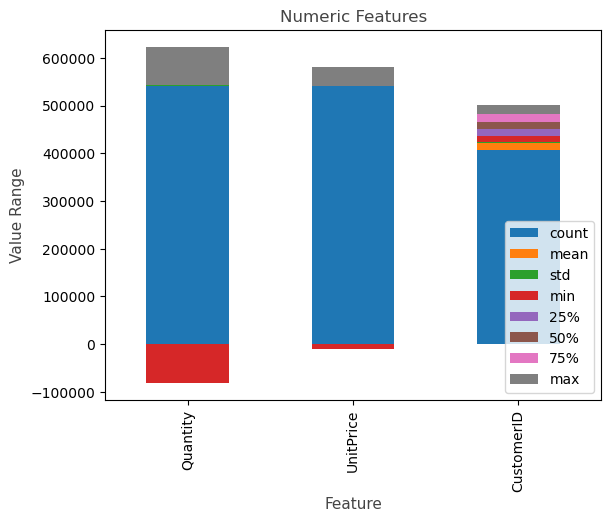

In [7]:
print()
print("【﻿Ｎｕｍｅｒｉｃ　Ｆｅａｔｕｒｅｓ　Ｄｉｓｔｒｉｂｕｔｉｏｎ：】")
ecommerce.describe().T.astype(int).plot(kind='bar', stacked=True)
plt.title('Numeric Features', color='#444')
plt.xlabel('Feature', fontsize=11, color='#444')
plt.ylabel('Value Range', fontsize=11, color='#444');

<div class="alert alert-block alert-info">
<b>Chapter 1: Summary</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-info">
<b>CustomerID</b> <a class="tocSkip"></a>
    
CustomerID column is classified as a float number and contains lots of missing values. 

We still don't know if we'll use it, but we'll keep it for now, maybe we can recover some of the values.
    
<div class="alert alert-block alert-info">
<b>Description </b> <a class="tocSkip"></a>
    
Entries in the product description column contain a variety of characters. 

It seems that this column is not only used to describe a product, but more like an administrative diary of the store. 

Amoung others , We can find operational notes, transactions notes as 'damaged' , and some meaningless descriptions.

<div class="alert alert-block alert-info">
<b>Metrics</b> <a class="tocSkip"></a>

By using describe we see the measures of location and dispersion of the data. The best selling product seems to be the "WHITE HANGING HEART T-LIGHT HOLDER". 

Also, the Quantity and UnitPrice columns contain negative values.
</div>

***Let's continue with our exploration and move on to the data preprocessing step.***

<a id="2"></a>

### 𝐃𝐚𝐭𝐚 𝐏𝐫𝐞𝐩𝐫𝐨𝐜𝐞𝐬𝐬𝐢𝐧𝐠

#### Renaming Columns

<a id="renaming"></a>

In [8]:
ecommerce.rename(columns={"InvoiceNo": "invoice_#",
                          "StockCode": "stock_code",
                          "Description": "description",
                          "Quantity": "quantity",
                          "InvoiceDate": "invoice_date",
                          "UnitPrice": "unit_price",
                          "CustomerID": "customer_id",},
    inplace=True,
)

In [9]:
ecommerce['revenue'] = ecommerce['quantity'] * ecommerce['unit_price'] # Adding revenue column. 
                                                                       ## quantity * unit_price = revenue.

In [10]:
ecommerce['description'] = ecommerce['description'].str.lower() # lowerig case 'Description'

In [11]:
# Adding 'Imcome' & 'Expenses' columns - We want to isolate the positive and negative values.

## This will help us further in the analysis, formulating conclusions relevant to the type of movement.

ecommerce["Expenses"] = ecommerce.loc[ecommerce['revenue'] < 0, 'revenue']
ecommerce["Income"] = ecommerce.loc[ecommerce['revenue'] > 0, 'revenue']

ecommerce["Expenses"] = np.where(np.isnan(ecommerce["Expenses"]), 0, ecommerce["Expenses"])
ecommerce["Income"] = np.where(np.isnan(ecommerce["Income"]), 0, ecommerce["Income"])

#### Data Conversions

<a id="conversion"></a>

In [12]:
# Converting invoice_date to datetime object

ecommerce['invoice_date'] = pd.to_datetime(ecommerce['invoice_date'], format = '%m/%d/%Y %H:%M')

ecommerce['month'] = pd.to_datetime(ecommerce['invoice_date']).dt.month # Adding month column

ecommerce['year'] = pd.to_datetime(ecommerce['invoice_date']).dt.year # Adding year column

# Adding the day of the week where Monday=0, Sunday=6.

ecommerce['purchase_day'] = ecommerce['invoice_date'].dt.dayofweek

In [13]:
ecommerce['month_year'] = pd.to_datetime(ecommerce['invoice_date']).dt.strftime('%Y-%m')

***Categorizing Months By Seasons:***

In [14]:
def season(dt):
    """
    This fucntion labels seasons By identifying months numbers ,
    and links them to theur relevant season.
    
    Input: Series of Integer numbers(int), range:1-12.
    
    Output: Returning season name (str).
    
    """
    if dt.month in [12, 1, 2]:
        return 'Winter'
    elif dt.month in [3, 4, 5]:
        return 'Spring'
    elif dt.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

In [15]:
ecommerce['season'] = ecommerce['invoice_date'].apply(season)

#### Processing Duplicates

<a id="duplicates"></a>

In [16]:
# Summing duplicated rows

ecommerce.duplicated().sum()

5268

In [17]:
print("There is {:.2%} of duplicated rows".format(ecommerce.duplicated().sum() / len(ecommerce)))

There is 0.97% of duplicated rows


In [18]:
ecommerce.loc[ecommerce.duplicated(keep = False), :].head(3) # checking for patterns

invoice_# stock_code                    description  quantity  \
485    536409      22111   scottie dog hot water bottle         1   
489    536409      22866  hand warmer scotty dog design         1   
494    536409      21866    union jack flag luggage tag         1   

           invoice_date  unit_price  customer_id  revenue  Expenses  Income  \
485 2018-11-29 11:45:00        4.95      17908.0     4.95       0.0    4.95   
489 2018-11-29 11:45:00        2.10      17908.0     2.10       0.0    2.10   
494 2018-11-29 11:45:00        1.25      17908.0     1.25       0.0    1.25   

     month  year  purchase_day month_year  season  
485     11  2018             3    2018-11  Autumn  
489     11  2018             3    2018-11  Autumn  
494     11  2018             3    2018-11  Autumn

***We can remove duplicate rows since there are no duplicates worth keeping or duplication patterns worth investigating.***

In [19]:
ecommerce.drop_duplicates(keep = 'first', inplace = True) # 5,268 duplicates rows have been removed
display(ecommerce.duplicated().sum())

0

#### Processing missing values

<a id="missing"></a>

In [20]:
ecommerce.isnull().sum()

invoice_#            0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135037
revenue              0
Expenses             0
Income               0
month                0
year                 0
purchase_day         0
month_year           0
season               0
dtype: int64

***Let's start with missing values in customr_id column***

In [21]:
print("Customer_id missing values in %:", (ecommerce["customer_id"].isnull().sum() / len(ecommerce))*100)

Customer_id missing values in %: 25.163377378918124


In [22]:
ecommerce[ecommerce['customer_id'].isnull()].sample(5) # checking for patterns

invoice_# stock_code                    description  quantity  \
238265    557937      22712               card dolly girl          1   
468109    576391      23208  lunch bag vintage leaf design         3   
430266    573585      20685          doormat red retrospot         3   
217444    555924      20727        lunch bag  black skull.         2   
79570     542998      20749     assorted colour mini cases         1   

              invoice_date  unit_price  customer_id  revenue  Expenses  \
238265 2019-06-21 15:30:00        0.83          NaN     0.83       0.0   
468109 2019-11-13 10:13:00        4.96          NaN    14.88       0.0   
430266 2019-10-29 14:41:00       15.79          NaN    47.37       0.0   
217444 2019-06-05 17:12:00        4.13          NaN     8.26       0.0   
79570  2019-01-31 12:16:00       16.63          NaN    16.63       0.0   

        Income  month  year  purchase_day month_year  season  
238265    0.83      6  2019             4    2019-06  Summer  
468109   14.88     11  2019             2    2019-11  Autumn  
430266   47.37     10  2019             1    2019-10  Autumn  
217444    8.26      6  2019             2    2019-06  Summer  
79570    16.63      1  2019             3    2019-01  Winter

<div class="alert alert-block alert-info">
<b>Missing Values in customer_id</b> <a class="tocSkip"></a>

Values in customr_id seem to be missing without any particular patterns. 

Attempts were made to recover missing customer id data, however since we would be focusing on product range analysis, this column is unnecessary.

Let's save a copy of customer_id in a list and continue our investigation.
</div>

In [23]:
customer_series = ecommerce['customer_id'] # customer_id Series

In [24]:
ecommerce = ecommerce.drop('customer_id',axis=1) # dropping 'customer_id' column

***Now let's continue by analyzing Missing Values in description:***

In [25]:
# summing missing values in description

ecommerce.description.isnull().sum() 

1454

In [26]:
ecommerce[ecommerce.description.isnull()].sample(3)

invoice_# stock_code description  quantity        invoice_date  \
132814    547701     84559D         NaN        -7 2019-03-22 16:42:00   
21785     538136      37509         NaN         2 2018-12-07 15:57:00   
305626    563704      37342         NaN       -66 2019-08-16 14:03:00   

        unit_price  revenue  Expenses  Income  month  year  purchase_day  \
132814         0.0     -0.0       0.0     0.0      3  2019             4   
21785          0.0      0.0       0.0     0.0     12  2018             4   
305626         0.0     -0.0       0.0     0.0      8  2019             4   

       month_year  season  
132814    2019-03  Spring  
21785     2018-12  Winter  
305626    2019-08  Summer

In [27]:
# filling missing values of description , based on matching values within groups of stock_code & description.

ecommerce['description'] = ecommerce['description'].\
fillna(ecommerce.groupby('stock_code')['description'].transform('first'))

In [28]:
print()
print("Total missing values left in description column:", ecommerce.description.isnull().sum())
print("Description missing values in %:", ecommerce["description"].isnull().sum() / len(ecommerce)) 

# the presence of missing values in disription is quit negligible now.


Total missing values left in description column: 112
Description missing values in %: 0.00020870563374770097


In [29]:
# safetly removing missing values in the Description.

ecommerce.dropna(subset = ['description'], inplace = True)

<div class="alert alert-block alert-info">
<b>Missing Values in description</b> <a class="tocSkip"></a>

The description and stock code columns retain a mutual relationship. 

So, for instance, we see multiple product descriptions alongside their associated codes, and vice versa. 

This pattern is not ideal for record maintenance, yet, it allows me to fill in missing values in the Description

column , by the help of groupby , fillna & transform methods.
</div>

***Now that we have finished cleaning the data, let's take another look at the info:***

In [30]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536529 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_#     536529 non-null  object        
 1   stock_code    536529 non-null  object        
 2   description   536529 non-null  object        
 3   quantity      536529 non-null  int64         
 4   invoice_date  536529 non-null  datetime64[ns]
 5   unit_price    536529 non-null  float64       
 6   revenue       536529 non-null  float64       
 7   Expenses      536529 non-null  float64       
 8   Income        536529 non-null  float64       
 9   month         536529 non-null  int64         
 10  year          536529 non-null  int64         
 11  purchase_day  536529 non-null  int64         
 12  month_year    536529 non-null  object        
 13  season        536529 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 

<a id="3"></a>

<div class="alert alert-block alert-info">
<b>Chapter 2: Summary</b> <a class="tocSkip"></a>

The pre-processing stage began with **lowering case** of the columns names , which will make our work easier

and make it more fluid.

<div class="alert alert-block alert-info">
<b></b> <a class="tocSkip"></a>
    
Continuing to **data enriching**, we added 4 additional columns:
    
Income, Expenses, revenue, season & month_year.

<div class="alert alert-block alert-info">
<b></b> <a class="tocSkip"></a>

From there we continued enriching the data and adapting it to the right format: 

altering the invoice_date column to a **datetime** type , will allow us to apply manipulations related to time and dates. 
    
We added four new columns: **month, year, month_year and purchase day**. 

Later, when we conduct a seasonal analysis, these columns will be utilized.

<div class="alert alert-block alert-info">
<b></b> <a class="tocSkip"></a>
    
Finally, we eliminated **duplicate rows** and dealt with **missing values**. 
    
Since the percentage of loss is negligible, I do not expect a distortion.
</div>

### EDA

<a id="eda"></a>

#### Studying Outliers

In [31]:
def limits(parameter):
    print('The histogram of: {}'.format(parameter))
    ecommerce[parameter].hist()
    plt.show()
    if ecommerce[parameter].mean()>ecommerce[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('-' * 10)
    print('Statistics on: {}'.format(parameter))
    print(ecommerce[parameter].describe())
    ninety_nine = np.percentile(ecommerce[parameter], 99)
    two = np.percentile(ecommerce[parameter], 2)
    print('-' * 10)
    print('min border:',two)
    print('max border',ninety_nine)
    print('-' * 10)
    print('The outliers are considerd to be values below',two, "and above",ninety_nine)
    print('We have',len(ecommerce[(ecommerce[parameter]<two)|(ecommerce[parameter]>ninety_nine)]), "values that we can consider outliers")

In [32]:
border_list = []
for parameter in ['unit_price', 'quantity', 'revenue']:
    ninety_nine = np.percentile(ecommerce[parameter], 99)
    two = np.percentile(ecommerce[parameter], 1)
    border_list.append([parameter,two,ninety_nine])

border_data=pd.DataFrame(border_list,columns=['parameter','min_border','max_border'])
border_data

parameter  min_border  max_border
0  unit_price        0.19     18.0000
1    quantity       -2.00    100.0000
2     revenue       -6.64    180.8024

The histogram of: unit_price


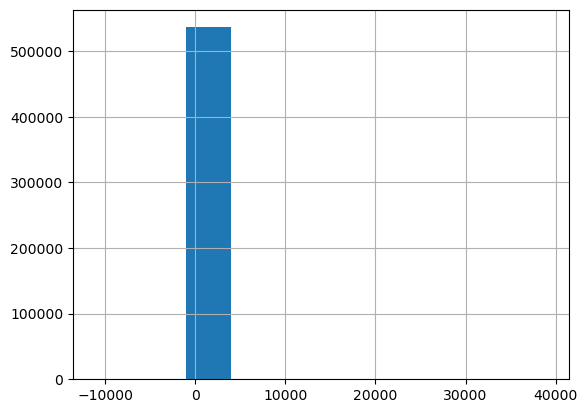

The distribution is skewed to the right
----------
Statistics on: unit_price
count    536529.000000
mean          4.633623
std          97.243243
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: unit_price, dtype: float64
----------
min border: 0.29
max border 18.0
----------
The outliers are considerd to be values below 0.29 and above 18.0
We have 11443 values that we can consider outliers
The histogram of: quantity


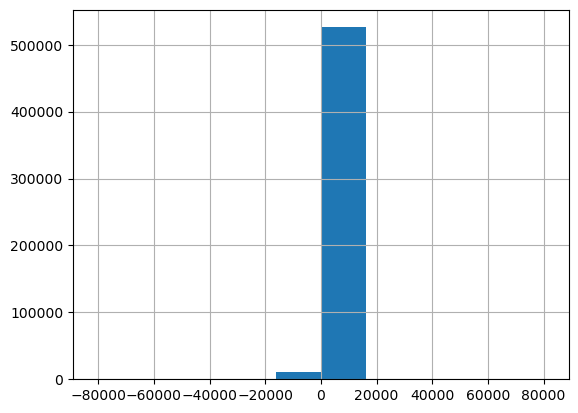

The distribution is skewed to the right
----------
Statistics on: quantity
count    536529.000000
mean          9.623748
std         219.152755
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64
----------
min border: 1.0
max border 100.0
----------
The outliers are considerd to be values below 1.0 and above 100.0
We have 15438 values that we can consider outliers
The histogram of: revenue


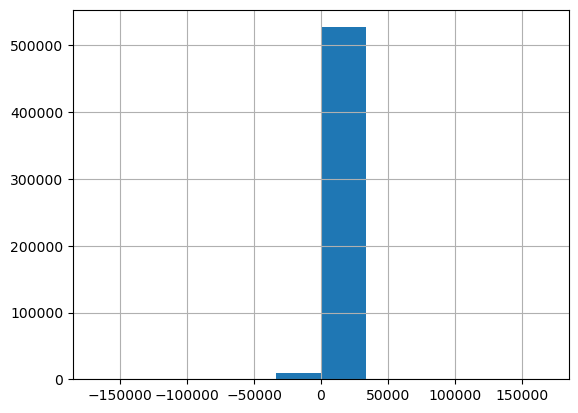

The distribution is skewed to the right
----------
Statistics on: revenue
count    536529.000000
mean         18.127644
std         380.695902
min     -168469.600000
25%           3.750000
50%           9.870000
75%          17.400000
max      168469.600000
Name: revenue, dtype: float64
----------
min border: 0.0
max border 180.80239999998827
----------
The outliers are considerd to be values below 0.0 and above 180.80239999998827
We have 14619 values that we can consider outliers


In [33]:
for parameter in ['unit_price', 'quantity', 'revenue']:
    limits(parameter)

In [34]:
ecommerce.query('unit_price==-11062.060000')

invoice_# stock_code      description  quantity        invoice_date  \
299983   A563186          B  adjust bad debt         1 2019-08-10 14:51:00   
299984   A563187          B  adjust bad debt         1 2019-08-10 14:52:00   

        unit_price   revenue  Expenses  Income  month  year  purchase_day  \
299983   -11062.06 -11062.06 -11062.06     0.0      8  2019             5   
299984   -11062.06 -11062.06 -11062.06     0.0      8  2019             5   

       month_year  season  
299983    2019-08  Summer  
299984    2019-08  Summer

***We will begin by exploring different aspects of product descriptions and codes:***

#### Descriptions With Multiple Stock Codes

<a id="top10des"></a>

In [35]:
# Let's check for descriptions that has more than 1 stock_coded;

stock = (
    ecommerce.groupby("description")["stock_code"]
    .nunique()
    .reset_index()
    .sort_values(by="stock_code", ascending=False)
)
stock.rename(columns={'description': 'name', 'stock_code':'count'}, inplace=True)

# no let's check for the top 10 descriptions by count:

stock.head(10)

name  count
737                    check    149
994                  damaged     58
122                        ?     47
996                  damages     44
1408                   found     33
3568   sold as set on dotcom     20
153               adjustment     17
176                   amazon     15
3817  unsaleable, destroyed.      9
3717             thrown away      9

In [36]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 
print('  ' * 100)
size = len(stock.loc[stock["count"] > 1])
print("{} descriptions has more than one unique code".format(size))
print('  ' * 100)

stock_10 = stock.loc[stock["count"] > 7]
print("The top {} descriptions has more than 7 codes each.".format(len(stock_10)))
print('  ' * 100)


fig = px.bar(stock_10, x="name", y="count", color="count",
              template='simple_white',  color_continuous_scale='Teal'
            )
fig.update_xaxes(type='category')
fig.update_layout(xaxis_title_font=dict(size=20, family='Dorid Sans', color='Purple'))
fig.update_layout(yaxis_title_font=dict(size=20, family='Dorid Sans', color='Purple'))
fig.update_layout(title= 'Top Descriptions By codes Count',\
                  title_font=dict(size=25, family='Dorid Sans', color='Purple'),title_x=0.5,title_y=0.9)

                                                                                                                                                                                                        
169 descriptions has more than one unique code
                                                                                                                                                                                                        
The top 10 descriptions has more than 7 codes each.
                                                                                                                                                                                                        


<a id="multides"></a>

In [37]:
# stock_codes with multiple descriptions

description = (
    ecommerce.groupby("stock_code")["description"]
    .nunique()
    .reset_index()
    .sort_values(by="description", ascending=False)
)

description.rename(columns={'description': 'count', 'stock_code':'code'}, inplace=True)
description.loc[description["count"] > 1]

code  count
168    20713      7
1947   23084      7
841    21830      6
3495   85175      6
2804  72807A      5
...      ...    ...
148    20681      2
2047   23188      2
1994   23135      2
153    20694      2
1814   22946      2

[650 rows x 2 columns]

In [38]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 

print('' * 100)
des_size = len(description.loc[description["count"] > 1])
print("There are {} codes that has more than one unique description".format(des_size))
print('' * 100)
des_size4 = description.loc[description["count"] > 4]
print("Among them {} codes that stores more than 4 descriptions each".format(len(des_size4)))


fig = px.bar(des_size4, x="code", y="count", color='count',
              template='simple_white', color_continuous_scale='Teal',
            )
fig.update_xaxes(type='category')
fig.update_layout(xaxis_title_font=dict(size=20, family='Dorid Sans', color='Purple'))
fig.update_layout(yaxis_title_font=dict(size=20, family='Dorid Sans', color='Purple'))
fig.update_layout(title= 'Top Codes By Descripitons Count',\
                  title_font=dict(size=25, family='Dorid Sans', color='Purple'),title_x=0.48,title_y=0.9)


There are 650 codes that has more than one unique description

Among them 9 codes that stores more than 4 descriptions each


<div class="alert alert-block alert-info">
<b>Insight</b> <a class="tocSkip"></a>

Already from this point, it is possible to see a lack of organization in the table's data.
    
Instead of having a unique code for each unique description, we see that there are 650 codes that have 

more than one description, and 169 descriptions that have more than one product code.
    
<b>Initial recommendation for data optimization</b> <a class="tocSkip"></a>
    
It is recommended that individual product codes and descriptions be kept separate from one another. 

The improper merging of descriptions or product codes under the same codes or descriptions , distorts the trends
    
in a way that does not adequately portray the observed trends of goods and dedicated codes; this will prevent confusion.
</div>

***Dive into more detailed data aspects of stocks and descriptions, as they tend to overlap.***

In [39]:
stock_code_list = ['20713', '23084', '21830', '85175', '72807A']
for c in stock_code_list:
    print("Stock code: {}".format(c))
    print("Descriptions: {}".format(ecommerce['description'].loc[ecommerce['stock_code'] == c].unique()))
    print()

Stock code: 20713
Descriptions: ['jumbo bag owls' 'wrongly marked. 23343 in box' 'wrongly coded-23343'
 'found' 'wrongly marked 23343' 'marked as 23343' 'wrongly coded 23343']

Stock code: 23084
Descriptions: ['rabbit night light' 'temp adjustment'
 'allocate stock for dotcom orders ta'
 'add stock to allocate online orders' 'for online retail orders' 'amazon'
 'website fixed']

Stock code: 21830
Descriptions: ['assorted creepy crawlies' 'merchant chandler credit error, sto'
 'sold as 1' '?' 'damaged' 'oops ! adjustment']

Stock code: 85175
Descriptions: ['cacti t-light candles' 'amazon sold sets' 'dotcom sold sets'
 'wrongly sold sets' '? sold as sets?' 'check']

Stock code: 72807A
Descriptions: ['set/3 rose candle in jewelled box' 'wet pallet' 'damages' '???missing'
 'amazon']



In [40]:
len(ecommerce[ecommerce['stock_code'].isin(stock_code_list)].sort_values('stock_code'))

2107

In [41]:
# checking rows witn zero price

zero=ecommerce[(ecommerce['stock_code'].isin(stock_code_list)) & \
               (ecommerce['unit_price'] == 0.0)].sort_values('stock_code')
len(zero)

44

In [42]:
# checking rows with negative amount

neg_quantity = ecommerce[ecommerce['quantity'] < 0]    # manual , bank charges, discount, postage, unsaleable/detroyed
                                                       #  mostly characterized by C in invoice_#
neg_quantity.sample()

invoice_# stock_code                     description  quantity  \
175284   C551948      21232  strawberry ceramic trinket box        -4   

              invoice_date  unit_price  revenue  Expenses  Income  month  \
175284 2019-05-03 11:21:00        1.06    -4.24     -4.24     0.0      5   

        year  purchase_day month_year  season  
175284  2019             4    2019-05  Spring

<div class="alert alert-block alert-info">
<b>Insight</b> <a class="tocSkip"></a>

We see that **negative** quantities are associated with descriptions such as: 'discount', 'postage', 'bank charges', 'manual'.

these items characterized by **invoice_# that start with 'C'** -  they might be canceled items.

while **positive** quantities are associated with generic product descriptions , We are less likely to find comments that do not describe a product.

</div>

In [43]:
ecommerce['invoice_#'] = ecommerce['invoice_#'].str.lower() # lower case invoice_#

In [44]:
print(ecommerce[ecommerce['invoice_#'].str.startswith('c')]['quantity'].describe())

count     9251.000000
mean       -29.787050
std       1147.997592
min     -80995.000000
25%         -6.000000
50%         -2.000000
75%         -1.000000
max         -1.000000
Name: quantity, dtype: float64


In [45]:
ordersC = ecommerce[ecommerce['invoice_#'].str.startswith('c')]

ordersC_perc = round(len(ordersC) / len(ecommerce)*100, 2)

print("{}% of the rows has incoice_# that starts with 'c'.".format(ordersC_perc))

1.72% of the rows has incoice_# that starts with 'c'.


In [46]:
print(ecommerce[ecommerce['invoice_#'].str.startswith('5')]['quantity'].describe())

count    527275.000000
mean         10.315257
std         160.384376
min       -9600.000000
25%           1.000000
50%           3.000000
75%          11.000000
max       80995.000000
Name: quantity, dtype: float64


In [47]:
orders5 = ecommerce[ecommerce['invoice_#'].str.startswith('5')]

<div class="alert alert-block alert-info">
<b>Insight</b> <a class="tocSkip"></a>

We see that we have 9251 items / transactions that their **invoice id start with 'C'**.

The value range is **negative** , And this strengthens my assumption that **these must be canceled or returned items.**

High standard deviation in quantity , amoung incoice_#'s that starts with 'C' indicates for strong 

variation of negative values . 

this is even more noticeable when comparing the dispersion indices of most 
    
transactions starting with the number "5".

</div>

In [48]:
len(neg_quantity) # checking len of negatives

10490

In [49]:
print("{:.2%} of purchases/items were canceled.".format(len(neg_quantity) / len(ecommerce)))

1.96% of purchases/items were canceled.


In [50]:
# find invoices that have letters

for i in ecommerce['invoice_#']:
    code = re.search('[a-bd-z]', i)
    if code is not None:
        print(code)

<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='a'>


***Let's explore invoice's with the letter 'a':***

In [51]:
ecommerce[ecommerce['invoice_#'].str.startswith('a')]

invoice_# stock_code      description  quantity        invoice_date  \
299982   a563185          B  adjust bad debt         1 2019-08-10 14:50:00   
299983   a563186          B  adjust bad debt         1 2019-08-10 14:51:00   
299984   a563187          B  adjust bad debt         1 2019-08-10 14:52:00   

        unit_price   revenue  Expenses    Income  month  year  purchase_day  \
299982    11062.06  11062.06      0.00  11062.06      8  2019             5   
299983   -11062.06 -11062.06 -11062.06      0.00      8  2019             5   
299984   -11062.06 -11062.06 -11062.06      0.00      8  2019             5   

       month_year  season  
299982    2019-08  Summer  
299983    2019-08  Summer  
299984    2019-08  Summer

***It seems that transactions identified with 'a' in 'invoice_#' are linked with 3 non-sales activities: "adjust bad debt".***

In [52]:
# storing 'a' in as an external Series

adjust_bad_debt = ecommerce[ecommerce['invoice_#'].str.startswith('a')]
# drop rows that have invoice_# start with a


ecommerce = ecommerce[~ecommerce['invoice_#'].str.startswith('a')]

In [53]:
ecommerce[ecommerce['invoice_#'].str.startswith('a')]

Empty DataFrame
Columns: [invoice_#, stock_code, description, quantity, invoice_date, unit_price, revenue, Expenses, Income, month, year, purchase_day, month_year, season]
Index: []

#### Top Stock Codes In Sales

<a id="topdessales"></a>

<a id="profitmonth"></a>

#### Stock Codes That Generate More Then 50k

In [54]:
# Let's check for codes with the highest Income;

best_codes = (
    ecommerce.groupby("stock_code")["Income"]
    .sum()
    .reset_index()
    .sort_values(by="Income", ascending=False)
)
best_codes.rename(columns={'Income': 'Total', 'stock_code':'Code'}, inplace=True)

# no let's check for the top 10 codes by Income:

best_codes_50k = best_codes.loc[best_codes["Total"] > 50000]

In [55]:
best_codes_50k.head(5)

Code      Total
3946     DOT  206248.77
1313   22423  174156.54
2471   23843  168469.60
3438  85123A  104462.75
2680   47566   99445.23

In [56]:
fig = px.bar(best_codes_50k, x='Code', y='Total',color='Total', template='simple_white',\
             hover_name='Total',   \
            color_continuous_scale='Teal', )
fig.update_layout(xaxis_title='Code', xaxis_title_font=dict(size=22, family='Droid Sans', color='Purple'))
fig.update_layout(yaxis_title='Total', yaxis_title_font=dict(size=22, family='Droid Sans', color='Purple'))
fig.update_layout(title='Most Profitable Stock Codes By Income',\
                  title_font=dict(size=25, family='Droid Sans', color='Purple'),title_x=0.48,title_y=0.9)
fig.show()

#### Less Profitable Stock Codes

<a id="100"></a>

In [57]:
# Let's check for codes with the highest Expenses;

worst_codes = (
    ecommerce.groupby("stock_code")["Expenses"]
    .sum()
    .reset_index()
    .sort_values(by="Expenses", ascending=True)
)
worst_codes.rename(columns={'Expenses': 'Total Loss', 'stock_code':'Code'}, inplace=True)

# now let's check for top 5 least profitable codes by Expenses:
worst_codes.head(5)

Code  Total Loss
3931  AMAZONFEE  -235281.59
2471      23843  -168469.60
3947          M  -146784.46
2025      23166   -77479.64
3949       POST   -11871.24

In [58]:
worst_codes_6k = worst_codes.loc[worst_codes["Total Loss"] < -6000]

In [59]:
fig = px.bar(worst_codes_6k, x='Code', y='Total Loss',color=-worst_codes_6k['Total Loss'], template='simple_white',\
             hover_name='Total Loss', error_y_minus='Total Loss', range_y=(0, -235281.59),  \
            color_continuous_scale='Teal')
fig.update_layout(xaxis_title='Code', xaxis_title_font=dict(size=22, family='Droid Sans', color='Purple'))
fig.update_layout(yaxis_title='Total', yaxis_title_font=dict(size=22, family='Droid Sans', color='Purple'))
fig.update_layout(title='Least Profitable Codes By Expenses',\
                  title_font=dict(size=25, family='Droid Sans', color='Purple'),title_x=0.48,title_y=0.95)
fig.show()

### Descriptions That Generate More Then 50k

<a id="101"></a>

In [60]:
best_descrip = (
    ecommerce.groupby("description")["Income"]
    .sum()
    .reset_index()
    .sort_values(by="Income", ascending=False)
)
best_descrip.rename(columns={'Income': 'Total', 'description':'Description'}, inplace=True)

# now let's check for the top 10 descriptions by Income:

best_descrip.head(10)

Description      Total
1128                      dotcom postage  206248.77
2966            regency cakestand 3 tier  174156.54
2493         paper craft , little birdie  168469.60
4007  white hanging heart t-light holder  106236.72
2519                       party bunting   99445.23
1900             jumbo bag red retrospot   94159.81
2145      medium ceramic top storage jar   81700.92
2801                             postage   78101.88
2135                              manual   77752.82
2851                  rabbit night light   66870.03

In [61]:
# Let's focuse on the best one , let's set a thershold for profitability:

best_descrip_50k = best_descrip.loc[best_descrip["Total"] > 50000]

In [62]:
fig = px.bar(best_descrip_50k, x='Description', y='Total',color='Total', template='simple_white',\
             hover_name='Total',   \
            color_continuous_scale='Teal', )
fig.update_layout(xaxis_title='Description', xaxis_title_font=dict(size=22, family='Droid Sans', color='Purple'))
fig.update_layout(yaxis_title='Total', yaxis_title_font=dict(size=22, family='Droid Sans', color='Purple'))
fig.update_layout(title='Most Profitable Descriptions By Income',\
                  title_font=dict(size=25, family='Droid Sans', color='Purple'),title_x=0.48,title_y=0.9)
fig.show()

<div class="alert alert-block alert-info">
   <b>Insight</b> <a class="tocSkip"></a>

<b>Descriptions That Generates Income</b> <a class="tocSkip"></a>
    
Let's put the description of the "paper crfat , little birdie" product aside for a moment. 
In the next step, we'll go over it in greater detail.
    
The graph shows the product descriptions that generated more than $50,000 in Income.
The store clearly makes a lot of money from deliveries.
Is this description, however, appropriate for storage in a column that mostly describes stock products?

Among the most popular items in the store are the **regency cakestand 3 tier**, **white/cream hanging heart t-light holder**, **jumbo bag red retrospot**, **rabbit night light**, and others.
    


<a id="102"></a>

### Less Profitable Descriptions By Expenses

In [63]:
# Let's check for Descriptions with the highest Expenses;

worst_descrip = (
    ecommerce.groupby("description")["Expenses"]
    .sum()
    .reset_index()
    .sort_values(by="Expenses", ascending=True)
)
worst_descrip.rename(columns={'Expenses': 'Total Loss', 'description':'Description'}, inplace=True)

# now let's check for top 10 least profitable descriptions by Expenses:

worst_descrip.head(10)

Description  Total Loss
178                           amazon fee  -235281.59
2493         paper craft , little birdie  -168469.60
2135                              manual  -146784.46
2145      medium ceramic top storage jar   -77479.64
2801                             postage   -11871.24
2966            regency cakestand 3 tier    -9697.05
946                      cruk commission    -7933.43
315                         bank charges    -7340.64
4007  white hanging heart t-light holder    -6624.30
1266  fairy cake flannel assorted colour    -6591.42

In [64]:
# let's set a thershold for Expenses

worst_descrip_6k = worst_descrip.loc[worst_descrip["Total Loss"] < -6000]

In [65]:
fig = px.bar(worst_descrip_6k, x='Description', y='Total Loss',color=-worst_descrip_6k['Total Loss'], template='simple_white',\
             hover_name='Total Loss', error_y_minus='Total Loss', range_y=(0, -235281.59),  \
            color_continuous_scale='Teal')
fig.update_layout(xaxis_title='Description', xaxis_title_font=dict(size=22, family='Droid Sans', color='Purple'))
fig.update_layout(yaxis_title='Total', yaxis_title_font=dict(size=22, family='Droid Sans', color='Purple'))
fig.update_layout(title='Least Profitable Descriptions By Expenses',\
                  title_font=dict(size=25, family='Droid Sans', color='Purple'),title_x=0.48,title_y=0.95)
fig.show()

In [66]:
mandatory_expenses = ecommerce.query(
    'description=="bank charges"|description=="cruk commission"|description=="amazon fee"')\
.Expenses.sum()

returned_products = ecommerce.query(
    'description=="fairy cake flannel assorted colour"|description=="medium ceramic top storage jar"|description=="white hanging heart t-light holder"')\
.Expenses.sum()

unclear_manual_issue = ecommerce.query('description=="manual"')

<div class="alert alert-block alert-info">
   <b>Insight</b> <a class="tocSkip"></a>


<b>Descriptions That Generates Expenses</b> <a class="tocSkip"></a>
    
To discuss the findings, let us divide the expenses of the discussed descriptions into three categories:
    

<b>Mandatory Expenses</b> <a class="tocSkip"></a>
    
Among the mandatory expenses are descriptions such as: **Amazon fee, Cruk Commission, and Bank Charges**.

**Postage** is a required product description that generates revenue in addition to expenses, which also must be stored in a separate data frame .

These descriptions do not relate to a stock product, but rather to an accounting operation.

It is better not to keep them in the description column since they distort the picture of revenue from appropriate products.
    

<b>Optional Expenses</b> <a class="tocSkip"></a>
    
Optional expenses are those that may or may not be incurred.

Among them are three products that generate profits, as well as losses in low percentages that must be accepted.

Consider things like cancelled a transactions.
    
    
<b>"Manual" Issue</b> <a class="tocSkip"></a>
    
The "manual" product description is an exception that stands out in the store's product landscape.
It contains both positive and negative values that affect revenue.
At the same time, it is unclear what "manual" refers to.
Investigating the data patterns associated with this description did not produce a clear answer.
However, it is a product description that ultimately leads to more losses than revenue.

Finally, 
the product description **"paper craft, little birdie"** is a product that was purchased and canceled during the transaction execution; it has no effect on the store's revenue and should be ignored.

Overall, already by now and based on our date , it's possible to conclude that the store is profitable.

<a id="103"></a>

## Top Stock Codes & Decriptions By Net Revenue:

In [67]:
best_by_revenue = (
    ecommerce.groupby(['description', 'stock_code'])['revenue'])\
    .sum().reset_index().sort_values(by="revenue", ascending=False)

best_by_revenue.head(5)

description stock_code    revenue
1510                      dotcom postage        DOT  206245.48
3441            regency cakestand 3 tier      22423  164459.49
2981                       party bunting      47566   98243.88
4583  white hanging heart t-light holder     85123A   97659.94
2346             jumbo bag red retrospot     85099B   92175.79

In [68]:
from IPython.display import display, HTML

### Revenue - Mind Map
<img src="https://drive.google.com/uc?id=1Om4Gtu2EkKgPC64rfWQIR3iaMZG1vhz8"/>'

<a id="104"></a>

#### Most Affordable & Most Expensive Products

In [69]:
ecommerce.unit_price.describe()

count    536526.000000
mean          4.654267
std          93.658303
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: unit_price, dtype: float64

In [70]:
ecommerce['description'] = ecommerce['description'].str.rstrip()

In [71]:
# looking for prodcts with the lowest cost

zero_unit_price = ecommerce.query('unit_price==0')
ecommerce.query('unit_price!=0').unit_price.min()
ecommerce.query('unit_price==0.001')

# Our lowet unit_price that is not zero (but pretty much is): 0.003 "pads to match all cushions"

ecommerce.query('description=="pads to match all cushions"').revenue.sum() # 4 trans , 0.003 $ in total

ecommerce.query('unit_price!=0').unit_price.max()
ecommerce.query('unit_price==38970') # description = 'manual'.

ecommerce.query('unit_price<300&unit_price>250').description.value_counts()

dotcom postage                  42
manual                          16
vintage red kitchen cabinet      8
vintage blue kitchen cabinet     3
discount                         2
samples                          1
postage                          1
Name: description, dtype: int64

<div class="alert alert-block alert-info">
   <b>Insight</b> <a class="tocSkip"></a>


<b>Most Affordable Vs. Most Expensive Goods</b> <a class="tocSkip"></a>
    
**Pads to match all cushions** have the lowest unit price that is not zero. 
    
This product costs 0.001 and generated a total revenue of $0.003. 
Maybe we need to consider raising the price or remove it from the supply chain. 
The cost of keeping the data related to him is most likely greater than its actual value.

**Vintage red kitchen cabinet** is a real product with the highest unit cost (not "including postage", "bank charges", "manual", "samples", and so on). 
Its price has fluctuated, with the most recent drop appearing to be $125 at the end of 2019.

<a id="105"></a>

#### Low Demand Stock Codes

In [72]:
threshold = 1
counts = ecommerce['stock_code'].value_counts()

In [73]:
low_demand_items = ecommerce.loc[ecommerce['stock_code'].isin(counts[counts == threshold].index), :]

In [74]:
low_demand_items_list = low_demand_items['stock_code'].to_list() # low demand list

In [75]:
low_demand_items.unit_price.value_counts().head(5)

0.00    18
2.46     8
2.91     6
1.65     5
4.95     5
Name: unit_price, dtype: int64

In [76]:
low_demand_items.head(3)

invoice_# stock_code                          description  quantity  \
1985   c536548      20957         porcelain hanging bell small        -1   
2313    536576      82615  pink marshmallow scarf knitting kit        36   
4582    536796      21268             vintage blue tinsel reel         2   

            invoice_date  unit_price  revenue  Expenses  Income  month  year  \
1985 2018-11-29 14:33:00        1.45    -1.45     -1.45    0.00     11  2018   
2313 2018-11-29 16:11:00        2.55    91.80      0.00   91.80     11  2018   
4582 2018-11-30 15:46:00        0.42     0.84      0.00    0.84     11  2018   

      purchase_day month_year  season  
1985             3    2018-11  Autumn  
2313             3    2018-11  Autumn  
4582             4    2018-11  Autumn

In [77]:
low_demand_items.describe().T

count         mean         std      min      25%      50%  \
quantity      121.0  -152.239669  647.271105 -5368.00     1.00     1.00   
unit_price    121.0     5.694463   10.239308     0.00     0.83     2.91   
revenue       121.0    14.508926   52.552326   -12.75     1.65     4.95   
Expenses      121.0    -0.338430    1.675507   -12.75     0.00     0.00   
Income        121.0    14.847355   52.429060     0.00     1.65     4.95   
month         121.0     8.157025    3.598630     1.00     5.00    10.00   
year          121.0  2018.776860    0.418083  2018.00  2019.00  2019.00   
purchase_day  121.0     2.413223    1.509246     0.00     1.00     2.00   

                  75%      max  
quantity         3.00   200.00  
unit_price       5.95    83.33  
revenue         11.64   527.85  
Expenses         0.00     0.00  
Income          11.64   527.85  
month           11.00    12.00  
year          2019.00  2019.00  
purchase_day     4.00     5.00

<div class="alert alert-block alert-info">
   <b>Low Demand Stoock Codes</b> <a class="tocSkip"></a>

It's also important to examine products that aren't popular. 
    
In the following visualization, we can see how each code unit price changes by months. 

In [78]:
fig = px.bar(low_demand_items, x="stock_code", y="unit_price", color="season", \
             template='simple_white', color_discrete_sequence=["lightblue", "lightgreen", "#457", "#479"],\
             animation_frame='month_year', barmode='overlay', range_y=[0,140])

fig.update_layout(
    title="Low Demand Items - Unit Price", 
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    paper_bgcolor="rgb(243, 243, 243)",
    plot_bgcolor="rgb(243, 243, 243)",
    )
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, dict(frame=dict(duration=2000,redraw=True),mode='immediate',transition=dict(duration=50))]
        ),
                 dict(
            label='Pause',
            method='animate',
            args=[[None],dict(frame=dict(duration=0,redraw=False),mode='immediate',transition=dict(duration=0))]
        )]
    )]
)



fig.show()

<div class="alert alert-block alert-info">
<b>Low Demand Stoock Codes: Metrics and characterizations</b> <a class="tocSkip"></a>
    
The general trend is that Unpopular products seem to be priced lower than $20.

The amount of unpopular product codes tends to be higher in the fall season, and lowest in the summer season.

Low-demand items are more likely to be sold on December.

Low-demand items are more likely to be sold on Tuesday and less likely to be sold on Monday.

It is interesting to note that the median unit price of less popular products is significantly higher than

the median unit price of the entire data set. This figure is explained by individual unpopular products with 

a relatively high unit price that raises the median (products such as: "pink painted kashmiri chair"

and "set of 16 vintage sky blue cutlery").

<div class="alert alert-block alert-info">

Having said that, since the sample of unpopular codes is quite small, it's not possible to identify
    
patterns that connect one trend to another in a way that encourage us to draw a broad conclusion or reoccomedation.

#### Low Demand Descriptions

<a id="106"></a>

In [79]:
threshold_des = 1
counter = ecommerce['description'].value_counts()

In [80]:
low_demand_des = ecommerce.loc[ecommerce['description'].isin(counter[counter == threshold_des].index), :]

In [81]:
low_demand_des.describe().T

count         mean         std     min      25%       50%  \
quantity      242.0  -163.028926  616.478504 -5368.0  -116.00     1.000   
unit_price    242.0     3.048636    7.733557     0.0     0.00     0.095   
revenue       242.0    19.010041   90.136243   -54.0     0.00    -0.000   
Expenses      242.0    -0.392355    3.660648   -54.0     0.00     0.000   
Income        242.0    19.402397   89.976961     0.0     0.00     0.000   
month         242.0     7.466942    3.617750     1.0     4.00     8.000   
year          242.0  2018.847107    0.360630  2018.0  2019.00  2019.000   
purchase_day  242.0     2.752066    1.509478     0.0     1.25     3.000   

                   75%      max  
quantity         6.000  3100.00  
unit_price       2.950    83.33  
revenue         11.835   996.00  
Expenses         0.000     0.00  
Income          11.835   996.00  
month           11.000    12.00  
year          2019.000  2019.00  
purchase_day     4.000     5.00

In [82]:
low_demand_des.season.value_counts()

Autumn    80
Spring    61
Winter    59
Summer    42
Name: season, dtype: int64

In [83]:
low_demand_des_list = low_demand_des['description'].to_list()

<div class="alert alert-block alert-info">
   <b>Low Demand Descriptions</b> <a class="tocSkip"></a>

Now let's examine products descriptions that aren't popular. 
    
In the following visualization, we can see how each description unit price changes over months. 

In [84]:
fig = px.bar(low_demand_des, x="description", y="unit_price", color="season", \
             template='simple_white', color_discrete_sequence=["lightblue", "lightgreen", "#457", "#479"],\
             animation_frame='month_year', barmode='overlay', range_y=[0,100])

fig.update_layout(
    title="Low Demand Descriptions - Unit Price", 
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    paper_bgcolor="rgb(243, 243, 243)",
    plot_bgcolor="rgb(243, 243, 243)",
    )
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, dict(frame=dict(duration=2000,redraw=True),mode='immediate',transition=dict(duration=50))]
        ),
                 dict(
            label='Pause',
            method='animate',
            args=[[None],dict(frame=dict(duration=0,redraw=False),mode='immediate',transition=dict(duration=0))]
        )]
    )]
)

fig.update_layout(
    xaxis=dict(automargin=True),
    yaxis=dict(automargin=True)
)
fig.update_layout(
    width=950,
    height=500
)

fig.update_layout(
    xaxis=dict(
        tickangle=15
    )
)
fig.update_layout(
    xaxis=dict(
        tickfont=dict(size=10),
        ticklen=5
    )
)

fig.show()

<div class="alert alert-block alert-info">
<b>Low Demand Descriptions: Metrics and characterizations</b> <a class="tocSkip"></a>
    
The general trend is that Unpopular products descriptions seem to be priced lower than $20.

Low-demand descriptions are more likely to be sold on Winter & and less likely to be sold on Spring.

#### Low Demand Descriptions , Stock Codes & Most Affordable Vs. Most Expensive Goods: Mind Map

<img src="https://drive.google.com/uc?id=1_evlyHIM0w8lBIMyKebXaWcEWVqiJBHn"/>'

#### Analyzing Unprofitable Descriptions 

<a id="107"></a>

In [85]:
zeros = ecommerce.groupby(['description', 'stock_code'])['revenue', 'quantity'].sum().reset_index()
absolute = zeros.query('revenue==0')

In [86]:
# A list of unique descriptions
descriptions = absolute['description'].unique().tolist()
descriptions = list(set(descriptions))

# tokenize unique descriptions
descriptions_tok = list(map(str.split, descriptions))

In [87]:
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.tokenize import word_tokenize

# convert list of lists to a list

descriptions_tok_flat = []
for sublist in descriptions_tok:
    for item in sublist:
        descriptions_tok_flat.append(item)

# lemmatize unique desriptions

wordnet_lemma = WordNetLemmatizer()
lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in descriptions_tok_flat]

In [88]:
word_count = (
    pd.DataFrame(Counter(lemmas), index=["count"])
    .transpose()
    .sort_values("count", ascending=False)
    .reset_index(level=0)
)
word_count.rename(columns = {'index':'lemma'}, inplace = True)

In [89]:
# online
online = ["online" , "website", "online orders",  "dotcom", "amazon", "dotcomgiftshop",
          "asos.", "ebay"]
# samples
samples = ['samples', 'sample']

# mystery
mystery = ["difference?....se", "!", "fba", "w/hse", "s", "wa", "???", "ctn", "??",
           "?", "mystery!", "can't find", "????damages????", "damages/dotcom?",
           "damages?", "check?", "lost", "lost in space", "lost??"]
# wrong
wrong = [
    "wrong", "wrongly", "error", "incorrectly", "oops", "problem", "incorrect", 
    "label mix up", "mixed up", "mixed up with c"]

# barcode
barcode = ["barcode", "23343", "coded", "20713", "coded-23343", 
           "1800", "code", "(22467)", "85123a", "22804", "(22719)", "c550456", "47", "84930", "1800"]
# names
names = ["alan", "mia", "jackie", "lewis", "john", "michel"]

# damages
damages = ["damages/samples", "damages/credits", 
           "damage", "damaged", "crushed", "rusty",
           "mouldy", "damages/showroom", "away-rusty",
           "made-thrown", "broken", "smashed", "damages/credits",
           "wet/rusty", "cracked", "destroyed.", "unsaleable,",
           "samples/damages", "damages/display", "wet/mouldy",
           "faulty", "smudges/thrown", "unsaleable.", "throw",
           "thrown", "wet", "breakages", "dagamed"]
# mailout
mailout = ['mailout']

# found
found = ["found"]

# display
display = ['display']

# counts
counts = ["count", "counted"]

#check
check = ["check"]

# adjustmnent
adjustment = ["adjustment", "adjust"]

# aside
aside = ["had been put aside", 'aside']

# returned
returned = ["returned"]

In [90]:
def category(description):
    #names
    for i in returned:
        if i in description:
            return 'returned'
    for i in mailout:
        if i in description:
            return 'mailout'
    for i in aside:
        if i in description:
            return 'aside'
    for i in found:
        if i in description:
            return 'found'
    for i in counts:
        if i in description:
            return 'counts'
    for i in check:
        if i in description:
            return 'check'
    for i in adjustment:
        if i in description:
            return 'adjustment'
    for i in online:
        if i in description:
            return 'online'
    for i in names:
        if i in description:
            return 'names'
    for i in damages:
        if i in description:
            return 'damages'
    for i in barcode:
        if i in description:
            return 'codes'
    for i in samples:
        if i in description:
            return 'samples'
    for i in mystery:
        if i in description:
            return 'mystery'
    for i in display:
        if i in description:
            return 'display'

In [91]:
absolute['category'] = absolute['description'].apply(category)
round(absolute.category.value_counts(normalize=True), 3)

damages       0.298
check         0.250
mystery       0.164
online        0.112
found         0.061
adjustment    0.048
codes         0.035
aside         0.010
names         0.007
mailout       0.007
counts        0.003
returned      0.003
samples       0.003
Name: category, dtype: float64

In [92]:
pallete =  ['rgb(157,174,179)', 'rgb(4,189,158)', 'rgb(46,184,226)',
                'rgb(114,219,206)', "rgb(31,120,180)"]

labels = ['damages','check','mystery','online', 'found', 'adjustment', 'codes', 'aside',
          'names', 'mailout', 'counts', 'returned', 'samples']
values = [0.298, 0.250, 0.164, 0.112, 0.061, 0.048, 0.035, 0.010, 0.007, 0.007, 0.003, 0.003, 0.003]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker_colors=pallete,
                             pull=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])])

fig.update_layout(
    height = 800,
    width=1000,
    title="Non-Profitable Descriptions",
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    title_x=0.49,
    title_y=0.9,
    paper_bgcolor="rgb(243, 243, 243)",
    plot_bgcolor="rgb(243, 243, 243)",
    
    
)
fig.update_traces(textfont_size=16)
fig.show()

In [93]:
des_zer_per = round((len(descriptions) / len(ecommerce.description.unique())) * 100)

print('{}% of all unique descriptions in the data doesn\'t generate revenue.'.format(des_zer_per))

quantity_damages = absolute.query('category=="damages"').quantity.sum()

print()
print("The Quantity of goods were lost to damages is: {} units".format(quantity_damages))

online_quantity = abs(absolute.query('category=="online"').quantity.sum())
print()
print("{} units of goods were sold through an online suppliers".format(online_quantity))

mystery_quantity = abs(absolute.query('category=="mystery"').quantity.sum())
print()
print("{} Units have been lost or we are unsure what happened to them.".format(mystery_quantity))

codes_involved = len(absolute.stock_code.unique())
involved_share = round(codes_involved / len(ecommerce.stock_code.unique()) *100)
print()
print("Unprofitable descriptions, affecting approximately {} different product codes.".format(codes_involved))
print()
print(
    '{}% of unique stock codes are associated with operations that didn\'t generate any revenue for the store.'.\
format(involved_share))

4% of all unique descriptions in the data doesn't generate revenue.

The Quantity of goods were lost to damages is: -88684 units

8237 units of goods were sold through an online suppliers

24633 Units have been lost or we are unsure what happened to them.

Unprofitable descriptions, affecting approximately 486 different product codes.

12% of unique stock codes are associated with operations that didn't generate any revenue for the store.


<div class="alert alert-block alert-info">
   <b>Insight</b> <a class="tocSkip"></a>


<b>Descriptions and Stock Codes that generate no revenue</b> <a class="tocSkip"></a>
    
Almost 30% of transaction descriptions that did not generate revenue are labeled as **"damages."**
    
About 25% of the descriptions are labeled as **"check."**
    
Approximately 16.5% of the descriptions are labeled as **"mystery".**

This is the most problematic category since we have no idea what actually occurred to the product(s) or quantities.

Take note of the low percentage of **returned items.**
    
In practice, it is higher, but it is hidden from view by a greater number of transactions about which we have no idea what

happened.    


#### Seasonality

<a id="seasonality"></a>

#### Top Season By  Total Revenue

<a id="Topseason"></a>

In [94]:
rev_by_sea_year = ecommerce.groupby(['season','year'])['revenue'].sum().reset_index()
rev_by_sea_year.sort_values(by='revenue', ascending=False)

season  year      revenue
1  Autumn  2019  3572357.112
3  Summer  2019  2088860.081
2  Spring  2019  1905395.951
5  Winter  2019  1423732.260
4  Winter  2018   642183.730
0  Autumn  2018   104539.880

In [95]:
print(
    "Autumn 2019 is the leading season in term of revenue with: {}".format(
        round(rev_by_sea_year.revenue.max())
    ),
    "$ in total revenue",
)
print(
    "Autumn 2018 is was lowest season in term of revenue with: {}".format(
        round(rev_by_sea_year.revenue.min())
    ),
    "$ in total revenue",
)

Autumn 2019 is the leading season in term of revenue with: 3572357 $ in total revenue
Autumn 2018 is was lowest season in term of revenue with: 104540 $ in total revenue


In [96]:
from plotly.subplots import make_subplots

In [97]:
rev_by_sea_year.rename(columns={"year": 'Year', 'season': 'Season', 'revenue': 'Revenue'}, inplace=True)

In [98]:
                                                  # 🆂🅴🅰🆂🅾🅽🆂
fig = px.scatter(
    rev_by_sea_year.query("Year!=2017"),
    x="Revenue",
    y="Season",
    size=round(rev_by_sea_year["Revenue"]),
    color="Season",
    hover_name="Season",
    size_max=60,
    text="Season",
    facet_col="Year",
    color_discrete_sequence=[
        px.colors.qualitative.Alphabet[6],
        px.colors.qualitative.Alphabet[11],
        px.colors.qualitative.Plotly[2],
        px.colors.qualitative.Plotly[7],
        px.colors.qualitative.G10[5],
    ],
)

fig.update_layout(
    title="Revenues By Seasons",
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    title_x=0.49,
    title_y=0.9,
    xaxis=dict(
        title="Revenue",
        gridcolor="white",
        type="log",
        gridwidth=2,
    ),
    yaxis=dict(
        title="Season",
        title_font=dict(size=25, family="Droid Sans", color="purple"),
        gridcolor="white",
        gridwidth=2,
    ),
    paper_bgcolor="rgb(243, 243, 243)",
    plot_bgcolor="rgb(243, 243, 243)",
)


fig.show()


In [99]:
rev_by_sea_year['Prop'] = rev_by_sea_year['Revenue'] / rev_by_sea_year['Revenue'].sum()

rev_by_sea_year.sort_values('Prop', ascending = False)

Season  Year      Revenue      Prop
1  Autumn  2019  3572357.112  0.366882
3  Summer  2019  2088860.081  0.214527
2  Spring  2019  1905395.951  0.195685
5  Winter  2019  1423732.260  0.146218
4  Winter  2018   642183.730  0.065952
0  Autumn  2018   104539.880  0.010736

<a id="seaprop"></a>

In [100]:
pallete =  ['rgb(157,174,179)', 'rgb(4,189,158)', 'rgb(46,184,226)',
                'rgb(114,219,206)', "rgb(31,120,180)"]

labels = ['Autumn 2018','Autumn 2019','Spring 2019','Summer 2019', 'Winter 2018', 'Winter 2019']
values = [0.0107360, 0.366882, 0.195685, 0.214527, 0.065952, 0.146218]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker_colors=pallete, 
                             pull=[0.0, 0.2, 0.0, 0.0, 0.0, 0.])])

fig.update_layout(
    title="Revenues % By Seasons",
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    title_x=0.49,
    title_y=0.9,
    paper_bgcolor="rgb(243, 243, 243)",
    plot_bgcolor="rgb(243, 243, 243)",
    
    
)

fig.show()

#### Quantity By Seasons

<a id="quansea"></a>

In [101]:
quantity_by_sea_year = ecommerce.groupby(['season','year'])['quantity'].sum().reset_index()
quantity_by_sea_year.rename(columns={"season": 'Season', 'year': 'Year', 'quantity': 'Quantity'}, inplace=True)

quantity_by_sea_year.sort_values(by='Quantity', ascending=False)

Season  Year  Quantity
1  Autumn  2019   1870715
3  Summer  2019   1149386
2  Spring  2019   1023751
5  Winter  2019    778595
4  Winter  2018    293326
0  Autumn  2018     47644

In [102]:
print(
    "Autumn 2019 is the leading season in term of Quantity with a count of {}".format(
        quantity_by_sea_year.Quantity.max()
    ), "items that were available" 
)
print(
    "Autumn 2018 is was lowest season in term of Quantity with a count of {}".format(
        quantity_by_sea_year.Quantity.min()
    ), "items that were available" 
)

Autumn 2019 is the leading season in term of Quantity with a count of 1870715 items that were available
Autumn 2018 is was lowest season in term of Quantity with a count of 47644 items that were available


In [103]:
                                                # 🆀🆄🅰🅽🆃🅸🆃🆈

fig = px.histogram(quantity_by_sea_year, x="Season", y='Quantity', color='Season', facet_col='Year',\
                   facet_col_spacing=0.1, nbins=20,     color_discrete_sequence=[
        px.colors.qualitative.Alphabet[1], # Autumn
        px.colors.qualitative.Alphabet[19], #spring
        px.colors.qualitative.Alphabet[13], # summer
        px.colors.qualitative.Alphabet[18]
    ])

fig.update_layout(
    title="Quantities By Seasons",
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    title_x=0.49,
    title_y=0.9,
    paper_bgcolor="rgb(243, 243, 243)",
    plot_bgcolor="rgb(243, 243, 243)",
    
    yaxis=dict(
    title="Total Quantity",
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    gridcolor="white",
    gridwidth=2,
    )
)
fig.show()

### Top Stock Codes & Descriptions By Seasons

<a id="108"></a>

In [104]:
# top selling products by season, year and month 

top_codes_seasons = ecommerce.groupby(['season','month_year'])['stock_code'].nunique().reset_index()
top_codes_seasons.rename\
(columns={"season": 'Season', 'month_year': 'Year, Month', 'stock_code':'Count'}, inplace=True)
top_codes_seasons.sort_values(by='Count', ascending=False).head(5)

Season Year, Month  Count
3   Autumn     2019-11   2959
2   Autumn     2019-10   2921
10  Winter     2018-12   2760
1   Autumn     2019-09   2756
8   Summer     2019-07   2755

In [105]:
# top selling produts on each season:

top_stock_code_season  = ecommerce.groupby('season')['stock_code'].\
apply(lambda x: x.value_counts().index[0]).reset_index()
top_stock_code_season.sort_values(by='stock_code', ascending=False)

season stock_code
3  Winter     85123A
2  Summer     85099B
1  Spring      22423
0  Autumn      22086

In [106]:
autumn_best_seller = ecommerce.loc[382, 'description']

In [107]:
summer_best_seller = ecommerce.loc[177, 'description']

In [108]:
spring_best_seller = ecommerce.loc[880, 'description']

In [109]:
winter_best_seller = ecommerce.loc[0, 'description']

In [110]:
print("Winter Best Seller Product is: {}".format(winter_best_seller))
print()
print("Summer Best Seller Product is: {}".format(summer_best_seller))
print()
print("Spring Best Seller Product is: {}".format(spring_best_seller))
print()
print("Autumn Best Seller Product is: {}".format(autumn_best_seller))
print()
print("Amoung all seasons , {} is the top pruduct by value count.".format(winter_best_seller))

Winter Best Seller Product is: white hanging heart t-light holder

Summer Best Seller Product is: jumbo bag red retrospot

Spring Best Seller Product is: regency cakestand 3 tier

Autumn Best Seller Product is: paper chain kit 50's christmas

Amoung all seasons , white hanging heart t-light holder is the top pruduct by value count.


#### Seasons Mind Map:
<img src="https://drive.google.com/uc?id=1pS2EHRmQ4Ynz1yu4kJaC-Yud09hU1b7n"/>'

#### Top Products By Seasons, Month , Year ,  And Quantity

<a id="109"></a>

In [111]:
# Let's identefy our top leading product by quantity over seasons , months and years:

top_codes_sea_quant = ecommerce.groupby(['season','month_year','stock_code'])['quantity']\
.sum().reset_index()
top_codes_sea_quant\
.rename(columns={'season':'Season', 'month_year':'Year, Month', 'stock_code':'Code', 'quantity':'Quantity'}, inplace=True)

top_five_codes_quant = top_codes_sea_quant.sort_values(by='Quantity', ascending=False).head(5)

In [112]:
top_five_codes_quant.head(5)

Season Year, Month   Code  Quantity
8896  Autumn     2019-11  23084     14800
8136  Autumn     2019-11  22197     13330
9774  Autumn     2019-11  84826     12551
6750  Autumn     2019-10  84077      8276
8044  Autumn     2019-11  22086      8066

In [113]:
top_five_codes_quant.loc[8896:8044, 'Code']

8896    23084
8136    22197
9774    84826
6750    84077
8044    22086
Name: Code, dtype: object

In [114]:
top_five_codes_quant_list = top_five_codes_quant.loc[8896:8044, 'Code'].to_list()

In [115]:
best_code_b_quant_b_sea = ecommerce.loc[183218, 'description']

print("{} is the top product by quantity and sesaon overall.".format(best_code_b_quant_b_sea))

rabbit night light is the top product by quantity and sesaon overall.


### Expenses Vs. Income By Seasons

<a id="expe"></a>

In [116]:
expenses = ecommerce.pivot_table(
    index=["season", 'year'], values="Expenses", aggfunc='sum'
).reset_index()
expenses.rename(columns={"season": 'Season', 'year': 'Year'}, inplace=True)
expenses.sort_values(by="Expenses", ascending=True)

Season  Year   Expenses
5  Winter  2019 -361884.75
1  Autumn  2019 -169168.80
3  Summer  2019 -162741.59
2  Spring  2019 -125455.47
4  Winter  2018  -72862.79
0  Autumn  2018   -1866.33

In [117]:
incomes = ecommerce.pivot_table(
    index=["season", 'year'], values="Income", aggfunc='sum'
).reset_index()
incomes.rename(columns={"season": 'Season', 'year': 'Year'}, inplace=True)
incomes.sort_values(by="Income", ascending=True)

Season  Year       Income
0  Autumn  2018   106406.210
4  Winter  2018   715046.520
5  Winter  2019  1785617.010
2  Spring  2019  2030851.421
3  Summer  2019  2251601.671
1  Autumn  2019  3741525.912

In [118]:
o = pd.concat([incomes, expenses], join="outer").fillna(0).reset_index()
o.sort_values(by='Income', ascending=False)

index  Season  Year       Income   Expenses
1       1  Autumn  2019  3741525.912       0.00
3       3  Summer  2019  2251601.671       0.00
2       2  Spring  2019  2030851.421       0.00
5       5  Winter  2019  1785617.010       0.00
4       4  Winter  2018   715046.520       0.00
0       0  Autumn  2018   106406.210       0.00
6       0  Autumn  2018        0.000   -1866.33
7       1  Autumn  2019        0.000 -169168.80
8       2  Spring  2019        0.000 -125455.47
9       3  Summer  2019        0.000 -162741.59
10      4  Winter  2018        0.000  -72862.79
11      5  Winter  2019        0.000 -361884.75

In [119]:
fig = go.Figure()
fig.add_trace(go.Bar(x=o['Season'], y=o['Expenses'],
                base=[-361884.75,-169168.8,-162741.59,-125455.47,-72862.79,-1866.33],
                marker_color='#636EFA',
                name='expenses'))
fig.add_trace(go.Bar(x=o['Season'], y=o['Income'],
                marker_color='#00CC96',
                name='income'


                )
              ,
             )
fig.update_layout(
    title="Expenses Vs. Incomes By Seasons", 
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    paper_bgcolor="rgb(243, 243, 243)",
    plot_bgcolor="rgb(243, 243, 243)",
    )
fig.show()

### Unique Descriptions Proportion

<a id="round"></a>

In [120]:
unique_products = ecommerce.pivot_table(index=["season", "month_year"], values='description',\
                                       aggfunc='nunique').reset_index()

unique_products.sort_values(by='description', ascending=False).head(3)

season month_year  description
3  Autumn    2019-11         2954
2  Autumn    2019-10         2950
1  Autumn    2019-09         2763

In [121]:
unique_products['proportion'] = unique_products['description'] / ecommerce['description']\
.nunique()
unique_products['total_unique'] = ecommerce['description'].nunique()
unique_products.rename(columns={"description":"Unique", "proportion":"Proportion", \
                               'total_unique': "Total Uniques", "month_year": 'Month, Year'}, inplace=True)
unique_products["Season"] = "season"
unique_products = unique_products.reset_index()
unique_products.head(3)

index  season Month, Year  Unique  Proportion  Total Uniques  Season
0      0  Autumn     2018-11    1606    0.382837           4195  season
1      1  Autumn     2019-09    2763    0.658641           4195  season
2      2  Autumn     2019-10    2950    0.703218           4195  season

In [122]:
unique_products['Proportion'] = unique_products['Proportion'].round(1)

In [123]:
# https://plotly.com/python/sunburst-charts/

fig = px.sunburst(unique_products,
                  path=["Season", "season", "Month, Year", 'Total Uniques', 'Unique', "Proportion"],
                  values='Proportion',
                  width=650, height=650,
                 color_continuous_scale="blues",
                 color='Proportion',
                 )
fig.update_layout(uniformtext=dict(minsize=20))
fig.update_traces(hoverinfo="label+text+value", selector=dict(type='sunburst'))
fig.update_layout(
    title="Proportion Of Unique Descriptions By Year & Seasons", 
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    paper_bgcolor="rgb(243, 243, 243)",
    plot_bgcolor="rgb(243, 243, 243)",
    )


fig.show()

#### Descriptions Count By Seasons

<a id="rare"></a>

In [124]:
seasons_des = ecommerce.groupby(["season", "month_year"])["description"].nunique().sort_values(
    ascending=False
).reset_index().rename(columns={"description": "Count", "season": "Season", "month_year": "Month_Year"}, inplace=False)
seasons_des.head(3)

Season Month_Year  Count
0  Autumn    2019-11   2954
1  Autumn    2019-10   2950
2  Autumn    2019-09   2763

In [125]:
fig = px.bar(seasons_des, x="Month_Year", y="Count", color="Season", title="Descriptions Count By Seasons", \
             template='simple_white', color_discrete_sequence=["lightblue", "lightgreen", "#477", "#479"])

fig.update_layout(
    title="Descriptions Count By Seasons", 
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    paper_bgcolor="rgb(243, 243, 243)",
    plot_bgcolor="rgb(243, 243, 243)",
    )
fig.show()

#### Stock Codes Count By Seasons

<a id="dds"></a>

In [126]:
### stock code by seasons

seasons_codes = ecommerce.groupby(["season", "month_year"])["stock_code"].nunique().sort_values(
    ascending=False
).reset_index().rename(columns={"stock_code": "count"}, inplace=False)
seasons_codes.head(3)

season month_year  count
0  Autumn    2019-11   2959
1  Autumn    2019-10   2921
2  Winter    2018-12   2760

In [127]:
fig = px.bar(seasons_codes, x="month_year", y="count", color="season", title="Stock Codes By Seasons", \
             template='simple_white', color_discrete_sequence=["lightblue", "lightgreen", "#477", "#479"])

fig.update_layout(
    title="Stock Codes Count By Seasons", 
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    paper_bgcolor="rgb(243, 243, 243)",
    plot_bgcolor="rgb(243, 243, 243)",
    )
fig.show()

<div class="alert alert-block alert-info">
   <b>Insight</b> <a class="tocSkip"></a>


<b>Categorizing Seasons</b> <a class="tocSkip"></a>

We created a function that will map the months of the year according to seasons.
    
Then we applied the function to the month column using the apply method.
<div class="alert alert-block alert-info">

    

<b>Top Season In Revenue</b> <a class="tocSkip"></a>
    
The top season in revenue is Autumn 2019. 
    
Of all the given seasons in the data set, Autumn 2018 brought the lowest revenue.
<div class="alert alert-block alert-info">    
    
    
<b>Top Season In Quantity</b> <a class="tocSkip"></a>
    
The leading season in Quantity of goods is Autumn 2019, while Autumn 2018 is the season with the lowest Quantity.
<div class="alert alert-block alert-info">    
    
    
<b>Invome Vs. Expensess by Seasons</b> <a class="tocSkip"></a>
    
Winter 2019 is characterized as the season with the highest expenses. 
    
These expenses include, among others: returning products, debt payments, and operational expenses such as postage.
    
Autumn 2019 is the season with the highest income.
<div class="alert alert-block alert-info">        
    
<b>Unique Descriptions By Seasons</b> <a class="tocSkip"></a>  
    
Autumn 2019 is characterized as the season with the highest amount of unique descriptions. 
    
In other words, this season leads in the variety of different products that the store provided.
    
Examining the sunbrust visualization shows the way October and November of Autumn 2019 characterized by the 
    
high proportions.
    
<b>Unique Stock Codes By Seasons</b> <a class="tocSkip"></a>   

Fall 2019 is also characterized as the leading season in the uniqueness of product codes. Especially the months of October and November of that year.

<div class="alert alert-block alert-info">    

***We will continue the analysis under a deeper resolution - analyzing the data according to the months of the year.***

### Months

<a id="months"></a>

#### Revenue By Unique Descriptions Over Months

<a id="110"></a>

In [128]:
# checking monthly revenues , counting unique descriptions:

monthly_revenue = ecommerce.pivot_table(
    index="month_year",
    values=["description", "revenue"],
    aggfunc={"description": lambda x: len(x.unique()), "revenue": 'sum'},
).reset_index()
monthly_revenue.rename(columns={"revenue": "sum", "description":"Unique Descriptions"}, inplace=True)
monthly_revenue.sort_values(by='sum', ascending=False)

month_year  Unique Descriptions          sum
12    2019-11                 2954  1490607.500
11    2019-10                 2950  1131566.720
10    2019-09                 2763   950182.892
6     2019-05                 2564   767802.050
9     2019-08                 2613   735108.140
8     2019-07                 2746   703302.801
4     2019-03                 2526   662566.860
7     2019-06                 2613   650449.140
1     2018-12                 2714   642183.730
2     2019-01                 2616   607854.450
3     2019-02                 2375   491357.550
5     2019-04                 2480   475027.041
13    2019-12                 2366   324520.260
0     2018-11                 1606   104539.880

In [129]:
fig = px.bar(monthly_revenue, x='month_year', y='sum',color='Unique Descriptions', template='simple_white',\
             hover_name='Unique Descriptions', \
            color_continuous_scale='Teal',)

fig.update_layout(xaxis_title='Month_Year', xaxis_title_font=dict(size=22, family='Droid Sans'))
fig.update_layout(yaxis_title='Total Revenue', yaxis_title_font=dict(size=22, family='Droid Sans'))
fig.update_xaxes(tickfont=dict(size=15), color='purple')
fig.update_yaxes(tickfont=dict(size=15), color='purple')
fig.update_layout(title='Revenue By Unique Descriptions',\
                  title_font=dict(size=25, family='Droid Sans', color='Purple'),title_x=0.48,title_y=0.9)
fig.show()

#### Widest Range of Products By Months:

<a id="113"></a>

In [130]:
# uninque descriptions by months

mon_des = ecommerce.groupby("month_year")["description"].nunique().sort_values(
    ascending=False
).reset_index().rename(columns={"description": "Count", "month_year": "Month, Year"}, inplace=False)

In [131]:
mon_des.head(5)

Month, Year  Count
0     2019-11   2954
1     2019-10   2950
2     2019-09   2763
3     2019-07   2746
4     2018-12   2714

In [132]:
# unique stock codes by months

mon_cod = ecommerce.groupby("month_year")["stock_code"].nunique().sort_values(
    ascending=False
).reset_index().rename(columns={"stock_code": "Count", "month_year": "Month, Year"}, inplace=False)
mon_cod.head(5)

Month, Year  Count
0     2019-11   2959
1     2019-10   2921
2     2018-12   2760
3     2019-09   2756
4     2019-07   2755

 
   <div class="alert alert-block alert-info">
   <b>Insight</b> <a class="tocSkip"></a>
    
The most visible and noticeable trend is that there seems to be a positive correlation between the amount

of unique product descriptions alongside an increase in revenue.
    
<div class="alert alert-block alert-info">
<b>November 2019</b> <a class="tocSkip"></a>

November 2019 was the most successful month in terms of revenue with $1,490,607.5 .

This is also the month with the highest amount of unique product descriptions; 2960.

Although it seems that November 2018 is the least successful in all parameters , It would not be fair to compare

November of last year since our time frame starts at 29.11.2010

<div class="alert alert-block alert-info">
<b>December 2019</b> <a class="tocSkip"></a>

December 2019 may seem unsuccessful in terms of sales.

Despite this, in just one week we gain 50.5% of the total profits of December 2018.

This is an amazing figure that may indicate for rising profitability of the store.

<div class="alert alert-block alert-info">
<b> Worst Month</b> <a class="tocSkip"></a>

April 2019 is a full calendar month during which we managed to gain only $475,027.04 .

#### Revenues Total & Transactions Count By Months

<a id="111"></a>

In [133]:
# Monthly revenues & transactions

month_year = ecommerce.pivot_table(
    index="month_year",
    values=["revenue", "invoice_date"],
    aggfunc={"revenue": np.sum, "invoice_date": lambda x: len(x.unique())},
).reset_index()
month_year.rename(columns={"invoice_date": "Total Transactions"}, inplace=True)
month_year.sort_values(by='revenue', ascending=False).head(4)

month_year  Total Transactions      revenue
12    2019-11                3110  1490607.500
11    2019-10                2518  1131566.720
10    2019-09                1958   950182.892
6     2019-05                2042   767802.050

In [134]:
fig = px.bar(month_year, x="month_year", y='revenue', color='Total Transactions', template='simple_white',\
             color_continuous_scale='Teal', hover_name='revenue')
fig.update_layout(xaxis_title='Month_Year', xaxis_title_font=dict(size=22, family='Droid Sans', color='purple'))
fig.update_layout(yaxis_title='Revenue', yaxis_title_font=dict(size=22, family='Droid Sans', color='purple'))
fig.update_xaxes(tickfont=dict(size=15), color='purple')
fig.update_yaxes(tickfont=dict(size=15), color='purple')
fig.update_layout(title='Monthly Revenues & Transactions',\
                  title_font=dict(size=25, family='Droid Sans', color='purple'),title_x=0.49,title_y=0.9)
fig.show();

   <div class="alert alert-block alert-info">
   <b>Insight</b> <a class="tocSkip"></a>
    

    
<div class="alert alert-block alert-info">
<b>November 2019</b> <a class="tocSkip"></a>

The leading month in the number of transactions and total revenue is November 2019 with 3110 transactions.

<div class="alert alert-block alert-info">
<b>December 2019</b> <a class="tocSkip"></a>

It is interesting to note that compared to the previous graph , December 2019 is indeed characterized by a rather

low amount of transactions 622 , yet , the averge order value (AOV) might indicates that December baskets  

was larger.

Let's gain a deeper understanding of the Average Order Value by each month.

#### Customer Traffic Over Months

<a id="114"></a>

In [135]:
sct_mo = ecommerce.groupby("month_year")["invoice_#"].nunique().sort_values(
    ascending=False
).reset_index().rename(columns={"invoice_#": "Count", "month_year": "Month, Year"}, inplace=False)

In [136]:
fig = px.scatter(sct_mo, x='Month, Year', y='Count', color='Month, Year', size='Count', \
                 labels={'Month, Year':'Month', 'Count':'Number of Unique Invoices'},\
                 title="Number of Unique Invoices per Month", \
                 color_discrete_sequence=["#590", "#449", "#478", "#477", "#476", "#475", "#555"]
                )


fig.update_layout(
    title="Transactions By Months",
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    title_x=0.49,
    title_y=0.9,
    paper_bgcolor="rgb(243, 243, 243)",
    plot_bgcolor="rgb(243, 243, 243)",
    
    yaxis=dict(
    title="Transations",
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    gridcolor="white",
    gridwidth=2,
    
    ))
fig.update_layout(xaxis_title='Month, Year', xaxis_title_font=dict(size=22, family='Droid Sans', color='purple'))
fig.show()


#### Average Order Value - AOV

<a id="aov"></a>

In [137]:
month_year['AOV'] = month_year['revenue']  / month_year['Total Transactions']
aov_metric = month_year.sort_values(by='AOV', ascending=False)


fig = px.bar(aov_metric, x="month_year", y='revenue', color='AOV', template='simple_white',\
             color_continuous_scale='Teal', hover_name='AOV')
fig.update_layout(xaxis_title='Month_Year', xaxis_title_font=dict(size=22, family='Droid Sans', color='purple'))
fig.update_layout(yaxis_title='Revenue', yaxis_title_font=dict(size=22, family='Droid Sans', color='purple'))
fig.update_xaxes(tickfont=dict(size=15), color='purple')
fig.update_yaxes(tickfont=dict(size=15), color='purple')
fig.update_layout(title='AOV by Months',\
                  title_font=dict(size=25, family='Droid Sans', color='purple'),title_x=0.49,title_y=0.9)
fig.show();

<div class="alert alert-block alert-info">
   <b>Insight</b> <a class="tocSkip"></a>


<b>December 2019</b> <a class="tocSkip"></a>

December 2019 demonstrates an amazing figure: the average value of the order is the highest in the
    
investigated time period. 
    
Moreover, this figure was achieved in a period of only one week.

<b>November 2019</b> <a class="tocSkip"></a>
    
Although November 2019 is the month with the most transactions, it ranks only third in the AVO index.

This is another reminder of the cliché that it is not the quantity that matters but the quality.

#### Quantities by months

<a id="112"></a>

#### Top Stock Codes By Quantity Over Months

In [138]:
mon_cod_qua = ecommerce.groupby(["month_year","stock_code"])["quantity"].sum().sort_values(
    ascending=False
).reset_index().rename(columns={"quantity": "Sum", "month_year": "Month, Year"}, inplace=False)
mon_cod_qua.head(5)

Month, Year stock_code    Sum
0     2019-11      23084  14800
1     2019-11      22197  13330
2     2019-11      84826  12551
3     2019-10      84077   8276
4     2019-11      22086   8066

#### Top Descriptions By Quantity Over Months

In [139]:
mon_des_qua = ecommerce.groupby(["month_year","description"])["quantity"].sum().sort_values(
    ascending=False
).reset_index().rename(columns={"quantity": "Sum", "month_year": "Month, Year"}, inplace=False)
mon_des_qua.head(5)

Month, Year                        description    Sum
0     2019-11                 rabbit night light  14800
1     2019-11                     popcorn holder  13330
2     2019-11     asstd design 3d paper stickers  12551
3     2019-10  world war 2 gliders asstd designs   8276
4     2019-11     paper chain kit 50's christmas   8066

#### Revenue Shifts By Month

<a id="revshi"></a>

In [140]:
revenue_shift_by_month = ecommerce.groupby('month_year')['revenue'].sum().reset_index()
revenue_shift_by_month['pre_change'] = revenue_shift_by_month.revenue.pct_change()
revenue_shift_by_month['pre_change'] = revenue_shift_by_month['pre_change'].round(2)

revenue_shift_by_month.sort_values(by='pre_change', ascending=False).head(7)

month_year      revenue  pre_change
1     2018-12   642183.730        5.14
6     2019-05   767802.050        0.62
4     2019-03   662566.860        0.35
12    2019-11  1490607.500        0.32
10    2019-09   950182.892        0.29
11    2019-10  1131566.720        0.19
8     2019-07   703302.801        0.08

<a id="priceshi"></a>

#### Unique Descriptions Shifts By Month

<a id="desshi"></a>

In [141]:
des_shift_by_month =  ecommerce.groupby('month_year')['description'].nunique().reset_index()
des_shift_by_month['pre_change'] = des_shift_by_month.description.pct_change()
des_shift_by_month['pre_change'] = des_shift_by_month['pre_change'].round(2)

des_shift_by_month.sort_values(by='pre_change', ascending=False).head(3)

month_year  description  pre_change
1     2018-12         2714        0.69
11    2019-10         2950        0.07
4     2019-03         2526        0.06

#### Transactions Shifts By Month

<a id="transit"></a>

In [142]:
tra_shift_by_month =  ecommerce.groupby('month_year')['invoice_#'].nunique().reset_index()
tra_shift_by_month['pre_change'] = tra_shift_by_month['invoice_#'].pct_change()
tra_shift_by_month['pre_change'] = tra_shift_by_month['pre_change'].round(2)

tra_shift_by_month.sort_values(by='pre_change', ascending=False).head(3)

month_year  invoice_#  pre_change
1    2018-12       1705        4.59
4    2019-03       1941        0.42
6    2019-05       2284        0.40

#### Top Goods By Revenue Growth

<a id="revgain"></a>

In [143]:
# Grouping by month & description , calculating revenue sum base on month intervals
# for each group we select the revenue, calculating the sum, and select the top 10 rows

by_revenue_description=ecommerce.groupby([pd.Grouper(key='invoice_date', freq='MS'), 'description']).\
revenue.sum().reset_index()

by_revenue_description_top_10 = by_revenue_description.reset_index()\
.sort_values(by='revenue', ascending=False).head(10)

print(by_revenue_description_top_10)

       index invoice_date                         description   revenue
18503  18503   2019-06-01      picnic basket wicker 60 pieces  39619.50
31345  31345   2019-11-01                      dotcom postage  38360.88
32513  32513   2019-11-01                  rabbit night light  34499.58
32290  32290   2019-11-01      paper chain kit 50's christmas  29457.98
2394    2394   2018-12-01                      dotcom postage  23493.93
3617    3617   2018-12-01            regency cakestand 3 tier  23229.32
15891  15891   2019-05-01                       party bunting  19744.01
28389  28389   2019-10-01                      dotcom postage  18704.80
34115  34115   2019-12-01                      dotcom postage  17667.54
6825    6825   2019-01-01  white hanging heart t-light holder  16338.11


In [144]:
fig = px.scatter(by_revenue_description_top_10, x='invoice_date', y='revenue', color='description',
                 hover_name='description')

fig.update_layout(
    title="Top Goods By Monthly Revenue Growth.",
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    title_x=0.49,
    title_y=0.9,
    paper_bgcolor="rgb(243, 243, 243)",
    plot_bgcolor="rgb(243, 243, 243)",
    yaxis=dict(
    title="Total Revenue",
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    gridcolor="white",
    gridwidth=2
    ),
    xaxis_title='Month, Year', xaxis_title_font=dict\
                  (size=22, family='Droid Sans', color='purple')
)
fig.update_layout(legend=dict(title="Description",title_font=dict\
                              (size=20, family="Droid Sans", color="purple"),
                              bgcolor='white', borderwidth=1))
fig.show()

<div class="alert alert-block alert-info">
   <b>Months Exploration</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-info">
<b>Descriptions & Unique Stock Codes</b> <a class="tocSkip"></a>
    
November 2019 is the leading month in the number of unique product descriptions and codes.
    
The month with the highest quantity sold is November 2019, with product code 23084 and the corresponding 
    
description "rabbit night light" being the product with the highest quantity sold.
    
<div class="alert alert-block alert-info">   
<b>Median Unit Price By Months</b> <a class="tocSkip"></a>
We see that the median unit price remains stable throughout the studied period, except for the months of November,
    
December 2018 and February 2019, in which the median unit price is slightly higher.
    
<div class="alert alert-block alert-info">
<b>STD By Months - Unit Price</b> <a class="tocSkip"></a>   
    
The month of June 2019 is characterized by a record-breaking deviation in the price per unit.
    
This deviation can be explained by locating the code and description responsible for it. 
    
A single description of 'manul' with a positive unit price of $38970 but a negative quantity of -1 distorts 

the month's data, causing an increase in the price per unit on the one hand , a decrease in revenue and an increase 

in expenses on the other.

<div class="alert alert-block alert-info">
<b>Transactions By Months</b> <a class="tocSkip"></a> 

November 2019 is characterized as the most successful month in the number of unique transactions.

<div class="alert alert-block alert-info">
<b>Revenue Shifts By Months</b> <a class="tocSkip"></a> 

The greatest revenue increase was recorded in December 2018. 

At the same time, it should be noted that November 2018 contains only partial data, so rating December 2018

as the leading month would be incorrect. 

Looking at the change that occurred in May 2019, we can identify the leading month. 

This increase is also visible in the previous graph, which shows a significant increase in the number of transactions

between April and May 2019.

<div class="alert alert-block alert-info">
<b>Unit Price Shifts By Months</b> <a class="tocSkip"></a> 

Unit price increased by 17% in February 2019. 

A month earlier, unit price decreased by 18% compared to December 2018. 

In the last three months, unit price showed no relative changes.

<div class="alert alert-block alert-info">
<b>Revnue Grouth By desctiptions</b> <a class="tocSkip"></a>

The product that brought the highest income based months intervals is "picnic basket wicker 60 pieces".


### Analyzing Data By Weeks

<a id="115"></a>

In [145]:
ecommerce['week_start'] = ecommerce["invoice_date"].dt.to_period('W-MON')

In [146]:
best_week_des = ecommerce.groupby(['week_start','description'])['revenue']\
.sum().sort_values(ascending=False).reset_index() # best weeks by des

print(best_week_des.head(8))

              week_start                     description   revenue
0  2019-06-04/2019-06-10  picnic basket wicker 60 pieces  39619.50
1  2019-12-03/2019-12-09                  dotcom postage  17667.54
2  2018-12-04/2018-12-10                  dotcom postage  11619.52
3  2019-11-26/2019-12-02                  dotcom postage  11478.08
4  2019-10-22/2019-10-28              rabbit night light  10739.38
5  2018-12-04/2018-12-10        regency cakestand 3 tier  10723.79
6  2019-11-12/2019-11-18              rabbit night light  10679.37
7  2019-11-19/2019-11-25                  dotcom postage   9590.39


#### Top Weeks By Descriptions

<a id="116"></a>

In [147]:
top_10_month = best_week_des.head(10)
top_des_week = top_10_month

fig = px.bar(top_des_week, x='description', y='revenue', color='week_start', hover_name='description', \
             title='Top Weeks By Descriptions', log_x=False, color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_layout(
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    title_x=0.49,
    title_y=0.9,
    paper_bgcolor="rgb(243, 243, 243)",
    plot_bgcolor="rgb(243, 243, 243)",
    yaxis=dict(
    title="Total Revenue",
    title_font=dict(size=25, family="Droid Sans", color="purple"),
    gridcolor="white",
    gridwidth=2),
    xaxis_title='Description', xaxis_title_font=dict\
                  (size=22, family='Droid Sans', color='purple')
)
fig.show()

#### Potentional Gain Weeks

<a id="117"></a>

In [148]:
june4_10_week_2019 = ecommerce.query('invoice_date>="2019-06-04 00:00:00"&invoice_date<="2019-06-10 00:00:00"')

# jun 4th 2019: Eid Al Fitr , Usa

picnic_betweeen_jun04_10 = june4_10_week_2019[(june4_10_week_2019['description'].str.contains('picnic'))]

World_Environment_Day_june_5 = june4_10_week_2019[(june4_10_week_2019['description'].str.contains('recycle'))]

National_Iced_Tea_june_10 = june4_10_week_2019[(june4_10_week_2019['description'].str.contains('tea|mug|cup of|dispenser'))]

partial_revenue_by_holidays = picnic_betweeen_jun04_10.revenue.sum() + World_Environment_Day_june_5.revenue.sum()\
+ National_Iced_Tea_june_10.revenue.sum()

print(
    "During the week of June 4–10, the store gain revenue of at least {}$ from products that are related to this holidays."\
    .format(round(partial_revenue_by_holidays, 2)))                                                                   

During the week of June 4–10, the store gain revenue of at least 50865.45$ from products that are related to this holidays.


In [149]:
# Dec 3-9th 2019

dec3_9_week_2019 = ecommerce.query('invoice_date>="2019-12-03 00:00:00"&invoice_date<="2019-12-09 00:00:00"')
dec3_9_week_2019.query('description=="dotcom postage"')

cookie_national_day_dec_4 = dec3_9_week_2019[(dec3_9_week_2019['description'].str.contains('cookie|biscuit|oven'))]

# green monday also , DEC 9
world_soil_day_dec_5 = dec3_9_week_2019[dec3_9_week_2019['description'].str.contains("clay|land|wood|forest")]

# Second Sunday of Advent History

Second_Sunday_of_Advent = dec3_9_week_2019[(dec3_9_week_2019['description'].str.contains('christ|candle|glass ball|wine'))]


partial_dec_by_holidays = cookie_national_day_dec_4.revenue.sum() + Second_Sunday_of_Advent.revenue.sum() + \
world_soil_day_dec_5.revenue.sum()

print(
    "During the week of Dec 3–9, the store gain revenue of at least {}$ from products that are related to this holidays."\
    .format(round(partial_dec_by_holidays, 2)))   

During the week of Dec 3–9, the store gain revenue of at least 49826.23$ from products that are related to this holidays.


In [150]:
world_stroke_day_filtered = ecommerce[(ecommerce['invoice_date'] > '2019-10-29 00:00:00') \
                                  & (ecommerce['invoice_date'] < '2019-10-30 00:00:00')]

world_stroke_day_filtered [(world_stroke_day_filtered ['description'].str.contains('aid|plaster|cat|cat bowl|dog'))].head(3)

invoice_# stock_code                       description  quantity  \
428307    573420      21165      beware of the cat metal sign        12   
428316    573420      23158        set of 5 lucky cat magnets        12   
428389    573426      22554  plasters in tin woodland animals         1   

              invoice_date  unit_price  revenue  Expenses  Income  month  \
428307 2019-10-29 09:48:00        1.69    20.28       0.0   20.28     10   
428316 2019-10-29 09:48:00        2.08    24.96       0.0   24.96     10   
428389 2019-10-29 10:17:00        3.29     3.29       0.0    3.29     10   

        year  purchase_day month_year  season             week_start  
428307  2019             1    2019-10  Autumn  2019-10-29/2019-11-04  
428316  2019             1    2019-10  Autumn  2019-10-29/2019-11-04  
428389  2019             1    2019-10  Autumn  2019-10-29/2019-11-04

In [151]:
# grouping data and named aggregation on stock_code_code, quantity, and revenue

descriptions=ecommerce.groupby([pd.Grouper(key='invoice_date', freq='MS'), 'description']).\
agg(unique_items=('stock_code', 'nunique'),
         total_quantity=('quantity','sum'),
         total_revenue=('revenue','sum'))

descriptions.sort_values([('total_revenue')], ascending=False).head(5)

unique_items  total_quantity  \
invoice_date description                                                    
2019-06-01   picnic basket wicker 60 pieces             1              61   
2019-11-01   dotcom postage                             1              49   
             rabbit night light                         1           14800   
             paper chain kit 50's christmas             1            8066   
2018-12-01   dotcom postage                             1              52   

                                             total_revenue  
invoice_date description                                    
2019-06-01   picnic basket wicker 60 pieces       39619.50  
2019-11-01   dotcom postage                       38360.88  
             rabbit night light                   34499.58  
             paper chain kit 50's christmas       29457.98  
2018-12-01   dotcom postage                       23493.93

<div class="alert alert-block alert-info">
   <b>Weeks Exploration</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-info">
<b>Descriptions & Unique Stock Codes</b> <a class="tocSkip"></a>
    
picnic basket wicker 60 pieces leading again.
    
During the week starting on 04.06.2019 he brought in the highest revenue for the store.
    
Product code 22502 with the corresponding description "picnic basket wicker small" gained the highest income 
    
to the store during the week that started on 04.06.2019.

### Exploring Data By Days

<a id="118"></a>

#### Days Distribution

<a id="119"></a>

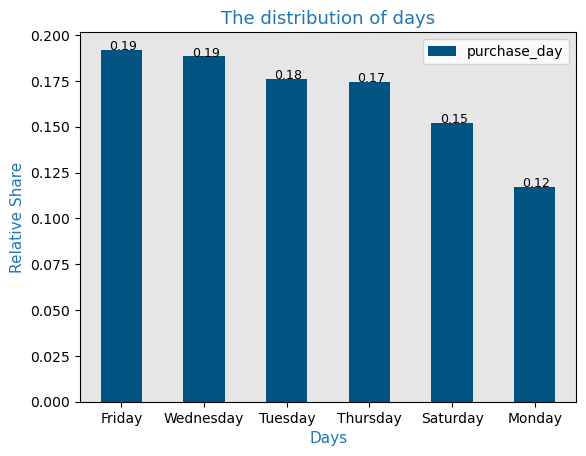

In [152]:
days_dist=ecommerce.purchase_day.value_counts(normalize=True)

days_dist.plot(kind='bar', color='xkcd:deep sea blue', rot=0)

plt.title('The distribution of days', color='tab:blue', size=13)
plt.gca().set_facecolor((0.9, 0.9, 0.9))
plt.ylabel('Relative Share', fontsize=11, color='tab:blue')
plt.xlabel('Days', fontsize=11, color='tab:blue')
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Friday', 'Wednesday', 'Tuesday', 'Thursday', 'Saturday', 'Monday'])
plt.legend()

for i, (x, y) in enumerate(days_dist.to_dict().items()):
    plt.text(i-.15, y, s=str(round(y, 2)), fontsize=9)
plt.show();

#### Top Quantities By Days

<a id="120"></a>

In [153]:
days_quantity = ecommerce.pivot_table(
    index='purchase_day',
    values=['quantity'],
    aggfunc={'quantity':'sum'}).reset_index()
days_quantity.sort_values(by='quantity', ascending=False)

purchase_day  quantity
4             4   1165783
3             3    967437
2             2    961238
1             1    813432
5             5    793264
0             0    462263

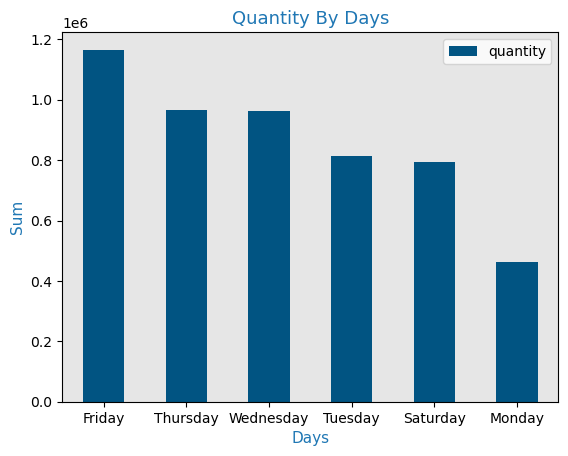

In [154]:
days_viz=days_quantity.sort_values(by='quantity', ascending=False) # quantity and by days

days_viz.plot(kind='bar', y='quantity', color='xkcd:deep sea blue', rot=0)
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Friday','Thursday','Wednesday','Tuesday','Saturday','Monday'])
plt.ylabel('Sum', fontsize=11, color='tab:blue')
plt.xlabel('Days', fontsize=11, color='tab:blue')
plt.title('Quantity By Days', color='tab:blue', size=13)
plt.gca().set_facecolor((0.9, 0.9, 0.9));

In [155]:
days_dict={
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday'
}

days_dict.get(2)

'Wednesday'

In [156]:
ecommerce=ecommerce.replace({"purchase_day": days_dict})

In [157]:
by_day_codes = ecommerce.groupby("purchase_day")["stock_code"].nunique().sort_values(
    ascending=False
).reset_index().rename(columns={"stock_code": "Count", "purchase_day": "Day"}, inplace=False)

by_day_codes

Day  Count
0   Thursday   3593
1     Friday   3575
2  Wednesday   3563
3    Tuesday   3555
4   Saturday   3517
5     Monday   3268

#### Exploring Friday Data

<a id="121"></a>

In [158]:
print("Unique items peak on Thursday. Friday comes second, and Monday ranked last on the list.")

Unique items peak on Thursday. Friday comes second, and Monday ranked last on the list.


In [159]:
                                               # 🅵 🆁 🅸 🅳 🅰 🆈

    
friday = ecommerce.query('purchase_day=="Friday"') # Friday data

friday_nunique_transactions = friday['invoice_#'].nunique() # 5633

firday_total_transactions = friday['invoice_#'].count() # Friday total transactions

friday_baskest = round((friday_nunique_transactions / firday_total_transactions), 2) # friday baskets

# friday top products - sorrted
top = friday.groupby(['stock_code'])['invoice_#'].nunique().reset_index()
top = top.sort_values(by='invoice_#', ascending=False)

# top 5 transactions prop:
top5_transaction_prop = top['invoice_#'].head(5).sum() / len(top)

# Friday top 5 filter:
friday_top_filter = friday.query("description=='regency cakestand 3 tier'|description=='white hanging heart t-light holder'|description=='jumbo bag red retrospot'|description=='assorted colour bird ornament'|description=='lunch bag red retrospot'")

# Friday top 5 metrics:
friday_top_5_metrics = friday_top_filter.describe().T

# Top 5 Median price:
friday_top_5_med = friday_top_filter.unit_price.median()

# Friday Top 5 revenue sum:
top_friday_rev_sum = friday_top_filter['revenue'].sum()

# Sold of Friday list:
friday_sold_list = friday.loc[(friday['purchase_day'] == 'Friday')\
                              & (friday['quantity'] == 1), 'stock_code'].tolist() #23,756
# Not-sold on Friday list:
not_sold_on_friday = ecommerce.loc[(~ecommerce['stock_code']\
                                    .isin(friday_sold_list)) & (ecommerce['quantity'] == 1), 'stock_code'].tolist()

# Friday-codes-free: no friday codes:
data_without_friday_codes = ecommerce.query("~(stock_code.isin(@friday_sold_list)) & (quantity == 1)") # len=2,444

# Friday revenue - top five excluded:
friday_rev_exclude_top_five = friday.query('revenue!="@friday_top_filter"')

# Friday revenue - top excluded , sum:
friday_rev_ex_top_sum = friday_rev_exclude_top_five.revenue.sum()

# Friday Top revenue proportion:
friday_top_rev_prop = round(friday_rev_ex_top_sum / top_friday_rev_sum)

In [160]:
print("-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽" * 14)
print("     " * 10)
print("     " * 10 + "Friday Metrics:")
print("     " * 10)
print(friday_top_5_metrics) # √⃞
print("     " * 10)
print("-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽" * 14)
print("     " * 10)
print("     " * 10 + "Friday Insights:")
print()
print("1. About 20% of the data set's records were made on Fridays.") # √⃞
print("     " * 10)
print("2. {}% of transactions made on Friday considerd as basket transactions".format(round(friday_baskest * 100))) # √⃞
print("     " * 10)
print("3. The total revenue gained on friday is {}$".format(friday.revenue.sum())) # √⃞ 
print("     " * 10)
print("4. A total of {}$ gained on friday by the top 5 items".format(top_friday_rev_sum)) # √⃞ 
print("     " * 10)
print("5. Revenues from the top 5 products make up about {}% of the total revenue on Fridays".format(friday_top_rev_prop)) # √⃞ 
print("     " * 10)
print("6. % of the top five prodct codes out the the total transactions on Friday is:{}%".format(round(top5_transaction_prop * 100))) # √⃞
print("     " * 10)
print("7. Friday median price is {}$".format(round(friday.unit_price.median(), 2))) # √⃞ 
print("     " * 10)
print("8. {}$ is the median price of the top 5 items sold on Friday".format(friday_top_5_med)) # √⃞ 
print("     " * 10)
print("9. Friday median quantity is {}".format(friday.quantity.median())) # √⃞
print("     " * 10)
print("10. {} is the median quantity on Friday for the top 5 items".format(friday_top_filter.quantity.median())) # √⃞
print("     " * 10)
print("11. Friday Expenses / Cancelled items , sums up to a total value of {}$".format(round(friday.Expenses.sum()))) # √⃞
print("     " * 10)
print("12. Friday Top 5 Expenses / cancelled items , sums up to a total value of {}$".format(friday_top_filter.Expenses.sum())) # √⃞
print("     " * 10)

-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽
                                                  
                                                  Friday Metrics:
                                                  
             count         mean         std     min      25%      50%  \
quantity    2093.0    18.250358   87.288819  -140.0     2.00     7.00   
unit_price  2093.0     5.101811    5.137024     0.0     1.69     2.55   
revenue     2093.0    52.214310  179.199835  -525.6    12.75    17.70   
Expenses    2093.0    -1.720416   18.597430  -525.6     0.00     0.00   
Income      2093.0    53.934725  177.710572     0.0    12.75    17.70   
month       209

 
   <div class="alert alert-block alert-info">
   <b>Insight</b> <a class="tocSkip"></a>
    
<div class="alert alert-block alert-info">
<b>Friday Top 5 Products</b> <a class="tocSkip"></a>
    
    
The top five products in sales on Fridays are:
    
1. regency cake stand 3 tier
2. white/cream hanging heart t-light holder.
3. jumbo bag red retro spot.
4. lunch bag red retro spot.
5. Assorted color bird ornament.
    
<div class="alert alert-block alert-info">
<b>Friday Trends</b> <a class="tocSkip"></a>

1 .37.0% of transactions that where made on Friday include items from the top 5 stock codes.

2 .The percentage of the top five product codes out of the total unique product sold on Friday is 58.63%.

####  Exploring Monday Data

<a id="122"></a>

In [161]:
                                                    # 🅼🅾🅽🅳🅰🆈


monday = ecommerce.query('purchase_day=="Monday"') # Monday data

monday_items = int(monday.stock_code.nunique()) # 3,268 items

monday_nunique_transactions = monday['invoice_#'].nunique() # 2,381

monday_total_transactions = monday['invoice_#'].count() # Monday total transactions: 62,806

monday_baskest = round((monday_nunique_transactions / monday_total_transactions), 2) # monday baskets

monday_overall_median = monday.unit_price.median()

top_mon = monday.groupby(['stock_code'])['invoice_#'].nunique().reset_index()
top_mon = top_mon.sort_values(by='invoice_#', ascending=False)

top_mon_transaction_prop = top_mon['invoice_#'].head(5).sum() / len(top_mon)

monday_top_filter = monday.query("stock_code=='85123A'|stock_code=='22469'|stock_code=='21034'|stock_code=='22423'|stock_code=='85099B'")

mon_top_qua = monday_top_filter.quantity.median() # Monday top 5 Quantity Median

monday_top_5_metrics = monday_top_filter.describe().T # Monday Top 5 Metrics

monday_metrics = monday.describe().T # monday Metrics

monday_rev_sum = round(monday.revenue.sum(), 1) # Monday Revenue Sum

mon_med_quan = monday.quantity.median() # Monday Quantity Median

# Top 5 Median price:
mon_day_top_5_med = monday_top_filter.unit_price.median()

# Monday Top 5 revenue sum:
top_mon_rev_sum = round(monday_top_filter['revenue'].sum())

mon_top_expen = round(monday_top_filter.Expenses.sum(), 2) # Monday Top 5 Expenses Sum

mon_expen = round(monday.Expenses.sum(), 2)

# Sold on Monday list:
monday_sold_list = monday.loc[(monday['purchase_day'] == 'Monday')\
                              & (monday['quantity'] == 1), 'stock_code'].tolist()
# Not-sold on Monday list:
not_sold_on_monday = ecommerce.loc[(~ecommerce['stock_code']\
                                    .isin(monday_sold_list)) & (ecommerce['quantity'] == 1), 'stock_code'].tolist()

# Monday-codes-free: no Monday codes:
data_without_monday_codes = ecommerce.query("~(stock_code.isin(@monday_sold_list)) & (quantity == 1)")

# Monday revenue - top five excluded:
monday_rev_exclude_top_five = monday.query('revenue!="@monday_top_filter"')

# Monday revenue - top excluded , sum:
monday_rev_ex_top_sum = monday_rev_exclude_top_five.revenue.sum()

# Monday Top revenue proportion:
monday_top_rev_prop = round(monday_rev_ex_top_sum / top_mon_rev_sum)


In [162]:
print("-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽" * 14)
print("     " * 10)
print("     " * 10 + "Monday Metrics:")
print("     " * 10)
print(monday_metrics) # √⃞
print("     " * 10)
print("-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽" * 14)
print("     " * 10)
print("     " * 10 + "Monday Insights:")
print()
print("1. About 15.5% of the data set's records were made on Modays.") # √⃞
print("     " * 10)
print("2. {}% of transactions made on Monddays considerd as basket transactions".format(round(monday_baskest * 100))) # √⃞
print("     " * 10)
print("3. The total revenue gained on Mondays is {}$".format(monday_rev_sum)) # √⃞ 
print("     " * 10)
print("4. A total of {}$ gained on Mondays by the top 5 items".format(top_mon_rev_sum)) # √⃞ 
print("     " * 10)
print("5. Revenues from the top 5 products make up about {}% of the total revenue on Mondays".format(monday_top_rev_prop)) # √⃞ 
print("     " * 10)
print("6. % of the top five product codes out the the total transactions on Mondays is:{}%".format(round(top_mon_transaction_prop * 100))) # √⃞
print("     " * 10)
print("7. Monday median price is {}$".format(monday_overall_median)) # √⃞ 
print("     " * 10)
print("8. {}$ is the median price of the top 5 items sold on Monday".format(mon_day_top_5_med)) # √⃞ 
print("     " * 10)
print("9. Monday median quantity is {}".format(mon_med_quan)) # √⃞
print("     " * 10)
print("10. {} is the median quantity on Monday for the top 5 items".format(mon_top_qua)) # √⃞
print("     " * 10)
print("11. Monday Expenses / Cancelled items , sums up to a total value of {}$".format(mon_expen)) # √⃞
print("     " * 10)
print("12. Monday Top 5 Expenses / cancelled items , sums up to a total value of {}$".format(mon_top_expen)) # √⃞
print("     " * 10)

-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽-͓̽
                                                  
                                                  Monday Metrics:
                                                  
              count         mean        std      min      25%      50%  \
quantity    62806.0     7.360173  23.866237  -360.00     1.00     3.00   
unit_price  62806.0     2.897355   8.050244     0.00     1.25     1.95   
revenue     62806.0    12.716292  30.363488  -434.51     2.95     6.60   
Expenses    62806.0    -0.129467   3.599266  -434.51     0.00     0.00   
Income      62806.0    12.845760  30.094193     0.00     2.95     6.60   
month    

#### Top Day By Revenue

<a id="123"></a>

In [163]:
revenue_by_days=ecommerce.groupby('purchase_day')['revenue'].sum()
revenue_by_days.sort_values(axis=0, ascending=False) # Looks like Friday in the top

purchase_day
Friday       2108701.530
Wednesday    1965703.611
Thursday     1730088.430
Tuesday      1584895.301
Saturday     1549020.681
Monday        798659.461
Name: revenue, dtype: float64

#### Special Days; 29.10.2019

<a id="124"></a>

In [164]:
# 2019-10-29 : National Cat day

df_filtered = ecommerce[(ecommerce['invoice_date'] > '2019-10-29 00:00:00') \
                        & (ecommerce['invoice_date'] < '2019-10-30 00:00:00') \
                        & (ecommerce['description'].str.contains('cat'))]

df_filtered.Income.sum()
df_filtered.Expenses.sum()
len(df_filtered)
len(ecommerce[(ecommerce['invoice_date'] > '2019-10-29 00:00:00') & (ecommerce['invoice_date'] < '2019-10-30 00:00:00')])
#df_filtered.Income.sum()
len(df_filtered)
df_filtered.Income.sum()

291.45000000000005

In [165]:
# 29-10-2019: world stroke day; 'pharmacie first aid tin / first aid' X 4 (Income total: 45.8)
#                             ;'emergency first aid tin' X 4 (Income total: 12.3)
# 

world_stroke_day_filtered = ecommerce[(ecommerce['invoice_date'] > '2019-10-29 00:00:00') \
                                  & (ecommerce['invoice_date'] < '2019-10-30 00:00:00') \
                                  & (ecommerce['description'].str.contains('plaster'))]

# plaster 143.31
# emergency first 12.3
# pharmacie first 13.29
# doctor's bag soft toy 16.63
# greeting card 15.6
# welcome 204.17

ecommerce[(ecommerce['invoice_date'] > '2019-10-29 00:00:00') \
                                  & (ecommerce['invoice_date'] < '2019-10-30 00:00:00') \
                                  & (ecommerce['description'].str.contains('emergency first'))].head(3)

invoice_# stock_code              description  quantity  \
429776    573576      22494  emergency first aid tin         3   
430667    573585      22494  emergency first aid tin         2   

              invoice_date  unit_price  revenue  Expenses  Income  month  \
429776 2019-10-29 14:09:00        2.46     7.38       0.0    7.38     10   
430667 2019-10-29 14:41:00        2.46     4.92       0.0    4.92     10   

        year purchase_day month_year  season             week_start  
429776  2019      Tuesday    2019-10  Autumn  2019-10-29/2019-11-04  
430667  2019      Tuesday    2019-10  Autumn  2019-10-29/2019-11-04

In [166]:
# National Oatmeal Day: 29-10-2019; 'oat' - nothing.

oat_day_filtered = ecommerce[(ecommerce['invoice_date'] > '2019-10-29 00:00:00') \
                                  & (ecommerce['invoice_date'] < '2019-10-30 00:00:00') \
                                  & (ecommerce['description'].str.contains('oat'))]


# Major League Baseball: 29-10-2019: 4 records (Income=50$)

ecommerce[(ecommerce['invoice_date'] > '2019-10-29 00:00:00') \
                                  & (ecommerce['invoice_date'] < '2019-10-30 00:00:00') \
                                  & (ecommerce['description'].str.contains('baseball'))].Income.sum()

49.88

### Hypothese Testing

<a id="125"></a>

#### Hepothese: The average quantity between two seasons is equal.

In [167]:
# Creating Samples

autumn = ecommerce[ecommerce['season'] == 'Autumn']['quantity']
summer = ecommerce[ecommerce['season'] == 'Summer']['quantity']

In [168]:
# look at average quantity for both seasons
print(
    "The average quantity in Autumn is: {:.2f}".format(autumn.sum() / len(autumn))
)
print(
    "The average quantity in Summer is: {:.2f}".format(summer.sum() / len(summer))
)
print(
    "Relative difference in average quantity between Autumn and Summer: {0:.2%}".format(
        summer.mean() / autumn.mean() - 1
    )
)

The average quantity in Autumn is: 9.58
The average quantity in Summer is: 10.30
Relative difference in average quantity between Autumn and Summer: 7.47%


In [169]:
from scipy import stats as st

**H0:** There is no statistical significance of the difference in the average quantity between Autumn and Summer.

**H1:** There is statistical significance of the difference in the average quantity between Autumn and Summer

In [170]:
alpha = 0.05
p_value = st.mannwhitneyu(autumn, summer)[1]
print('p-value: ', p_value)
if (p_value < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  8.207228217804382e-07
We reject the null hypothesis


**Conclusion:**  

we rejected the null hypothesis.
there is statistical significance difference in average quantity ,  between Autumn and Summer.

   ## Sumarry & Findings

<a id="1"></a>

We started our journey by learning & processing the data.
The initial table contained 541,909 rows and 7 columns.

**Data Preprocessing**

Variable data types and work formats did not match.
Income, expenses, month year, year, month, purchase day, season, and revenue were added to enhance processing.
These columns enrich data and provide deeper insights.
We removed duplicates and missing values that did not contribute to the analysis and modified the data types to 
their suitable formats.

Customer id values were frequently missing. 
We tried to reproduce some, but as the research focused on product line analysis, we abandoned this column.
Description column missing data were completed by matching description and stock code. 
Since they won't affect the analysis, we eliminated 112 lacking descriptions.

We've finished preprocessing with a table that now has 536,529 rows and 14 columns.

**EDA**

At this point, we can see that the unit price, quantity, and revenue columns are skewed to the right and contain outlier values that distort the statistical picture.
The extreme values in the various columns were real values that resulted from a variable interaction. 

Negative values in the revenue column, for example, resulted from negative values in the unit price or quantity columns. 

The revenue column's product is the product of these two columns. So, if we have high and positive quantities but a negative unit price, this results in a negative value in the corresponding revenue cell.

Extreme values in the unit_price and quantity columns resulted from poor record management, where administrative and financial transactions were recorded together in one place.

The extreme values were left as they were, and the continuation of the analysis was conducted while taking them into account.

**Different aspects of the data:**

During our analysis, we discovered several characteristics of the data:

1. **Code-description overlap:**
    the absence of a unique relationship between the description column and the stock_code column. 
    We identified 650 codes with more than one product description, plus 169 product descriptions with multiple codes.
    
2. **Spontaneous descriptions, not built in:**
    It seems that the creation of a code during a transaction is a spontaneous and unprepared product created by the
    transaction operator/seller. 
    This is how we find irrelevant descriptions together with profitable and genuine product codes.

3. **Negative Quantities:**
    Negative quantities are mostly characterized by C in "invoice_#" with descriptions such as: 
    "manual", "bank charges", "discount", "postage", "unsaleable/detroyed".
    ther'e make up about 1.72% out of the data , and it appears that they are associated with transactions that were cancelled.
    positive quantities are associated with generic product descriptions , We are less likely to find comments that
    don't describe a product.
    
**Findings:**


- **Stock Codes that generates more then 50K$ in income:**

 - DOT
 - 22423
 - 23843
 - 85123A
 - 47566

DOT product code , with the corresponding description "dotcome postage" is the leading product code in terms of gross income.

- **Less Profitable Stock Codes By Expenses**:

     - AMAZONFEE
     - 23843
     - 23166
     - POST
     - M

AMAZONFRR product code , with the corresponding description "amazon fee" is the leading product code in terms of
gross expenses.

- **Descriptions that generates motre then 50k$ in Gross Income:**

 - dotcome postage
 - regency cake stand 3 teir
 - white hanging heart t-light holder
 - party bunting
 - jumbo bag red retrospot
   - "paper craft, little birdie" has been removed from the list since this is a canceled transaction.


- **Less Profitable Descriptions By Gross Expenses:**:

 - amazon fee
 - manual
 - medium ceramic top storage jar
 - postage
 - regency cakestand 3 tier


- **Top Stock_Codes & Descriptions By Net Revenue:**

     - dotcom postage
     - regency cakestand 3 tier
     - white hanging heart t-light holder
     - jumbo bag red retrospot
     - party bunting
 

 
- **Most Affordable Vs. Most Expensive Goods:**

     - "Pads to match all cushions" have the lowest unit price that is not zero: 0.001$ per unit.
 
     - "Vintage red kitchen cabinet" is the product with the highest cost per unit: $125.
 

 
- **Low Demand Stoock Codes: Metrics and characterizations:**

 - Unpopular products seem to be priced lower than $20.
 
 - more likely to be sold on December.
 
 - more likely to be sold on Tuesday.
 
 - less likely to be sold on Monday.
 

 
- **low Demand Descriptions: Metrics and characterizations:**

 - Unpopular products descriptions seem to be priced lower than $20.

 - Low-demand descriptions are more likely to be sold on Winter & and less likely to be sold on Spring.
 

 
- **Unprofitable Descriptions**

 - 4% of all unique descriptions.
 
 - Affecting 486 different product codes.
 
 - 12% of unique stock codes.
 
 
 
- **Seasonality:**

 - Autumn 2019 is the leading season in revenue.
 
 - There is a minor skew in favor of Autumn in the statistics.
 
 - Winter 2019 is the lowest season for revenue gain.
 
 - Autumn 2019 is leading season in Quantity.
 
 -   We **substantiate a hypothesis for a future study , that there is no relationship between quantity and sales**, 
     as we would expect high quantities to indicate a lack of purchasing, whereas the findings show that Fall 2019 
     leads in both revenue and quantity.
 
 - Summer Best Seller: jumbo bag red retrospot.
 
 - Autumn Best Seller: paper chain kit 50's christmas.

 - Spring Best Seller: regency cakestand 3 tier.
 
 - Winter Best Seller: white hanging heart t-light holder.
 
 - Rabbit Night Light is the top product over seasons & years.

 - July 2019 and most of the fall months of 2019 lead in the range of unique products.
 
 - Autumn 2019 is the leading season in the overall count of descriptions.
 
 - In June 2019, the store's relative profit broke a record, thanks to the sale of picnic basket wicker 60 pieces
 
 
- **Best Months:**

    - November 2019 was the most successful month in terms of revenue.
    
    - April 2019 is the less successful month on which we managed to gain only $475,027.04
    
    - November 2019 was the most successful month in total transactions.
    
    - December 2019: in just one week we gain 50.5% of the total profits of December 2018
    
    - AOV: December 2019 demonstrate the highest Average Order Value , across all months.
    
    - November 2019 leads in unique descriptions & stock_codes.
    
    - 4 products out of the top 5 in terms of quantity sold were sold during the month of November 2019.
    
    - October 2019 demonstrates the most significant increase in the range of products: 7%.
    
    - March 2019 demonstrates the largest increase in the number of new orders, but on the other hand
      the number of unique products remained quite low.
      
      
- **Best Weeks**:

    -  2019-06-04/2019-06-10: top week by revenue : 39619.50 $ , picnic basket wicker 60 pieces.
    
    -  2019-12-03/2019-12-09:   17667.54 $ ,  dotcom postage.
    
    -  2018-12-04/2018-12-10:   11619.52 $ , dotcom postage.
    
    
- **Special Weeks & Holidays:**

2019-06-04/2019-06-10: 
    
- This week, three international holidays were observed: Eid Al Fitr, World Environment Day, and National Iced Tea
  Day in the United States. 
    
  The revenue gained by holiday-related products was at least 50865.45 dollars.
    
    
2019-12-03/2019-12-09:
    
- This week marked World Cookie Day, World Soil Day, and the Second Sunday of Advent. 
    
  The store's revenue from products related to these events is at least 49826.23 dollars .
    



- **Best Days:**

1. **Top Days For Transactions:**

    The day with the most transactions is Friday, while the day with the fewest transactions is Monday.
    
    **Top Days By Quantity:**
    
    Friday is also the day when the most products are sold, while Monday is the day when the least products are sold.
    
    **Top Day By Product Range:**
    
    On Thursdays the widest range of products is sold.
    
    **Top Day By Revenue:**
    
    Friday is the leading day in total revenue.
    
**Friday:**
    
   - 20% of the records were made on Fridays.
    
   - 5% of Fridays Transactions are considerd to be Baskets.
    
   - 19% of Friday's Revenue is gained by Top 5 products.
    
    
**Monday:**
    
   - 15% of the records were made on Mondays.
    
   - 4% of Fridays Transactions are considerd to be Baskets.
    
   - 28% of Monday's Revenue is gained by Top 5 products.
 

1. **Potential Days:**
    

   **2019-10-29: National Cat Day:**
    
   There were a total of 3408 sales that day, and at least 30 of these involved items for cats. 
   We only contributed $292.
        
   **2019-10-29: World Stroke Day:**
    
   Greeting cards, doctor's bags aimed for kids, bandages, and first aid kits all
   contributed to the over $400 in sales.
   We could have optimized the profits if the staff had been aware of this special day.
   
**Hypothesis Testing:**

We tested the hypothesis that there is no difference between the average Quantity between Autumn season Summer .

We got a P-value smaller than alpha so we reject the null hypothesis. 

The average quantities between the two seasons are different with a distinct difference.

<img src="https://drive.google.com/uc?id=12g-v7lEGkXCO4JDuleLY9WUJCUYyIt14"/>'

### Conclusions & Recommendations

<a id="545"></a>

**Recommendations concerning data managment:**


1. **Data Consistency:** 
    
   There doesn't appear to be a standard procedure for documenting transactions. 
   
   This allowed us to locate codes that match several product descriptions and vice versa.
   
   establishing unique relations across columns can assist guarantee that the values recorded
   
   in one column accurately reflect those recorded in another.
   
   As a result, fewer typos and other mistakes will be added to the database.
   
   Another adventages , are that Unique relations between columns can make it easier to identify data quickly ,
   
   preventing data duplication.
   
      
2. **Administrative and Financial Operations:**

   Administrative & Financial transactions such bank fees, commissions, and more are documented in this data set. 

   Since these transactions are fundamentally distinct from product sales, it is better to keep track of them
   
   in a separate column.
   
   To address this issues, one might consider using a linked database. Relationships can be established
   
   between tables in a linked database, enabling for information to be effectively connected.
   
   
3. **Uniform and relevant documentation:**
   
   The documentation for a transaction should be standard and shouldn't provide the documenter any 

   flexibility to write down whatever they please.
   

**Customer relations recommendations:**



1. **Utilize customer feedback:**

    We discovered that many buyers backed out of the transactions, sometimes on the same day. 
    
    It is important to obtain customer feedback on how they feel about the products. 
    
    If not, how do they think it could be improved ? 
    
    We might use the feedback we receive to improve our service.
    
    **Discounts and Promotions:**
    
    People are always looking for discounts. 
    
    On specific occasions, We might provide customers with a discount. 
    
    Let's use October 29th, 2019 (World Stroke Day) as an example: If we had offered discounts to clients
    
    in honor of this day, we may have boosted foot traffic and sales.
    
    
**Suggestions for boosting revenue:**


1.  **Top Products**:
    
    Keep selling the top items: 
    
    regency cake stand 3 tier, white hanging heart t-light holder, party bunting , jumbo bag red retrospot, 
    
    and rabbit night light. Prioritize the stock of these products , Check the prices of each product once more. 
    
    Is the investment still covered? If not, we adjusted the price slightly and returned the following month 
    
    to see how the price increases affected customer behaviour.
    
    
2.  **Calendar Tracking :**

    Every day is a reason to celebrate. 
    
    There are special days and events celebrated both locally and globally on the calendar. 
    
    Following these events gives us the ability to prepared for them. 
    
    We can increase sales and provide products that correspond with the needs and culture of our customer base
    
    if we channel product marketing  align with the theme of each holiday.

<a id="resource" ></a>

#### Resources & References

**Websites:**

[Days Calculator](https://www.timeanddate.com/date/duration.html?y1=2018&m1=11&d1=29&y2=2019&m2=12&d2=7)

[Which Day](https://www.wincalendar.com/eu)

#### Pandas Documentation:

- [Pivot Table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

- [mannwhitney Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)

- [Query](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)

- [Starstwith](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.startswith.html)

#### Visualizations:

- [Built-in Continuous Color Scales in Python](https://plotly.com/python/builtin-colorscales/)

- [Sunburn-Charts In Python](https://plotly.com/python/sunburst-charts/)

#### Mind Maps:

 - [Lucidchart](https://www.lucidchart.com/sign-up)

**Link to presentation:**

[Presentation](https://drive.google.com/file/d/1BJX9PjovoZhDVTD6fbiQJzCDONjMya6Y/view?usp=share_link)

#### Presentation Sources

- [Canva](https://www.canva.com/)

#### Presentation Photos:

- [Midjourney](https://midjourney.com/home/?callbackUrl=%2Fapp%2F)

<a id="pallete"></a>

In [171]:
import math

from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

<a id="basecolors"></a>

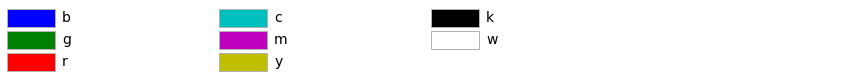

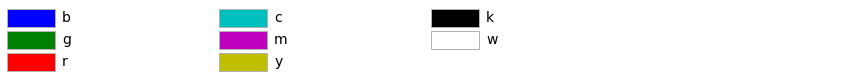

In [172]:
plot_colortable(mcolors.BASE_COLORS, ncols=3, sort_colors=False)

<a id="TABLEAU_COLORS"></a>

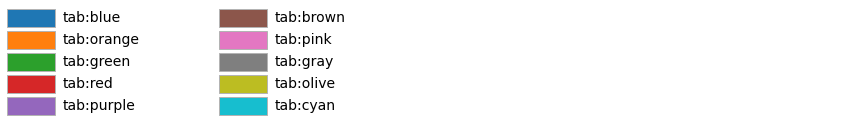

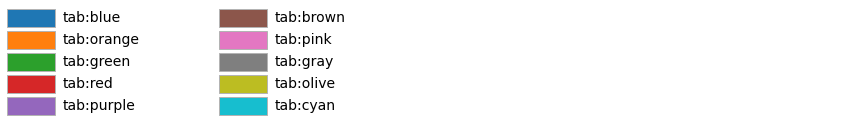

In [173]:
plot_colortable(mcolors.TABLEAU_COLORS, ncols=2, sort_colors=False)

<a id="CSS4"></a>

<a id="XKCD"></a>

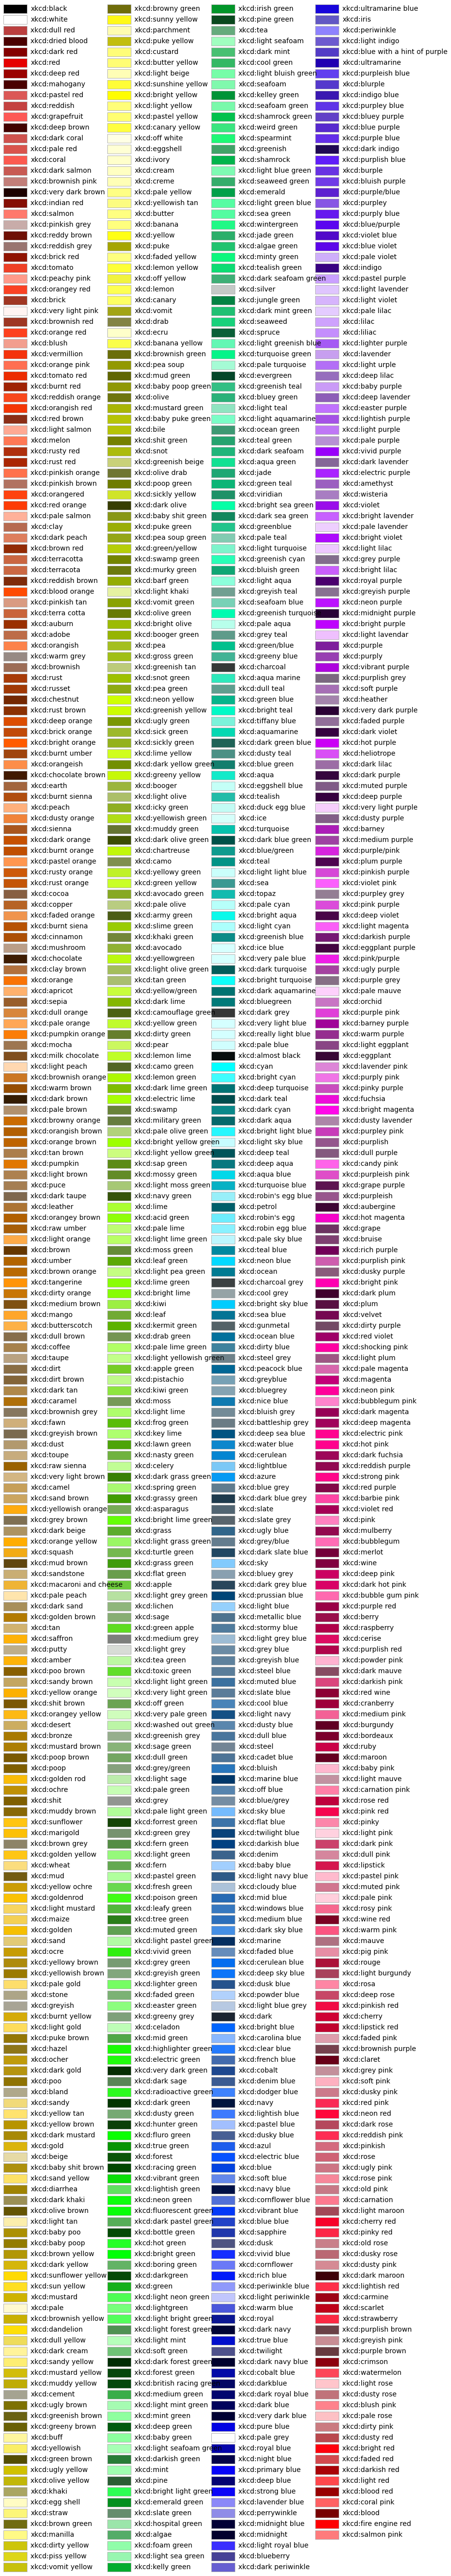

In [174]:
xkcd_fig = plot_colortable(mcolors.XKCD_COLORS)
xkcd_fig.savefig("XKCD_Colors.png")